In [ ]:

import numpy as np
import pandas as pd
import pylab as pl
from matplotlib import pyplot as plt
import seaborn as sns
import string
import pickle
import requests
from pprint import pprint
import json

In [ ]:
!pip install xmltodict
!pip install translators
!pip install selectorlib
import xmltodict
import translators as ts
from selectorlib import Extractor

In [ ]:
pd.read_csv('./cc_train.csv',sep = ";", encoding='utf-16')

,id,text,class,class_id,manufacturer,answer,attribute
0,1000277565,Aus Kraftkarton (RC) 160 g/qm <eos> SchnelleUe...,Deckblatt,24290306.0,Hamelin GmbH,24290306.0,NaN
1,2602159000,weiß 960 Et/PG sk permanentf <eos> Handbeschri...,Etikett Standardformat,24280601.0,Avery Zweckform GmbH,24280601.0,NaN
2,1000301311,Klappdeckelbox Kubus Bankers Box® System <eos>...,"Archiv-Box, -Schachtel",24290902.0,GEOtec,24290902.0,NaN
3,6000060143,Oxford ForMe Floral Softcover Collegeblock A 6...,Notizblock,24260201.0,Hamelin GmbH,24260201.0,NaN
4,1000355190,Kapazität ca. 12.500 Seiten passend für Kyocer...,"Toner, Tonereinheit (Laserdrucker, Kopierer)",19140601.0,UFP Austria GmbH,19140601.0,NaN
...,...,...,...,...,...,...,...
29872,6000111799,Immer stylisch organisiert - mit dem angesagte...,Taschenkalender,24301801.0,SIGEL GMBH,24301801.0,NaN
29873,6000025663,Kugelschreibermine <eos> Verwendung für Produk...,Kugelschreibermine,24240504.0,PILOT PEN (DEUTSCHLAND) GMBH,24240504.0,NaN
29874,6000098679,Füllhalter (Patronenfüllsystem) Twist P 457 M ...,Füllhalter (Patronenfüllsystem),24241103.0,Pelikan Vertriebsgesellschaft mbH,24241103.0,NaN
29875,6000065766,Die ELBA Urban Brieftasche im DIN A 5 Format b...,Dokumentenhülle,24292004.0,Hamelin GmbH,24292004.0,NaN


In [ ]:
samples = pd.read_csv('./sample.csv',sep = ";", encoding='utf-8-sig').drop(columns=["Unnamed: 0","Unnamed: 0.1","Unnamed: 0.2","Unnamed: 0.3","Unnamed: 0.4","Unnamed: 0.5"])

In [ ]:
samples

,Konzernartikelnummer,ECLASS_8_1,ECLASS_Name,Bezeichnung,Webbezeichnung,Detailinformation ( the one online),LieferantenDetailinformation (the company),OEMNummer,Hersteller,Marke,...,description_fewshot,postprocessed_zeroshot,postprocessed_oneshot,postprocessed_fewshot,pbs_cc_zeroshot,pbs_cc_oneshot,pbs_cc_fewshot,FleschReadingEase_zeroshot,FleschReadingEase_oneshot,FleschReadingEase_fewshot
0,1000027860,24290101,Broordner,Ordner sort. VELOCOLOR 4142300 A4/70mm,Ordner sortiert A4/70mm VELOCOLOR 4142300,Ordner VELOCOLOR?. Material der Kaschierung au...,Ordner VELOCOLOR?. Material der Kaschierung au...,4142300,Veloflex,VELOCOLOR,...,Eigenschaften::Schnellster Verschluss aller Ty...,In den letzten Monaten haben sich einige Leut...,In Schleswig-Holstein lebe ich in Bad Segeber...,"Max Mutzke (DSD-Künstler), Sarah Connor, Rea ...",25,50,100,46.762500,-13.879767,50.630853
1,2603884000,24290505,H„ngeordner,"H„ngeordner A4, 80mm schwarz LEITZ 1821-00-00","H„ngeordner A4, 8cm schwarz LEITZ 1821-00-00",Fr geheftete Ablage von Sammelakten. Hartpapp...,"Leitz Qualit„ts-H„ngeordner 180ø, mit patentie...",1821-00-00,LEITZ ACCO BRANDS GMBH & CO. KG,LEITZ,...,Hochwertiger „“Aktenh?ndler - ideal f?? zur A...,Hier geht es darum sich von alten Mustern los...,Eintrittspreis ins Aquarium\nDer Eintritt betr...,?–bergreifende Dokumente von unterschiedlicher...,25,25,0,40.270650,43.333333,-28.740976
2,1000041000,24241602,"CD-, DVD-, BD-Marker",Overheadstift 4ST WV sort. FABER CASTELL 151404 F,Overheadstift 4 Stck WV sortiert F FABER CA...,"Wasserl”sliche Folienstifte, ideal fr Overhea...",4er Etui MULTIMARK non-permanet F. Art der Sch...,151404,A.W. FABER-CASTELL GMBH & CO,FABER CASTELL,...,Das Land wurde erstmals 1784 vom Naturforsche...,Over Head Pen in Schwarz / rot\n................,wenn mir jemand erklärt was er meint dann sch...,"„Diejenigen, von denen man annimmt,dass ihre ...",50,25,25,74.440000,58.792303,9.618077
3,2766314000,24260901,"Brief-, Falt-, Visitenkarte unbedruckt",Visitenkarten 400ST weiá SIGEL LP796 225g A4,Visitenkarten 400ST weiá 225g A4 SIGEL LP796,"Mit den PC-Visitenkarten in 3C-Technologie, gl...","PC-Visitenkarten hochweiá, satiniert, mit eine...",LP796,SIGEL GMBH,SIGEL,...,dünne Karte aus flexiblem Kunststoff mit abge...,"1) Einen Brief, etwas oder jemanden beschreib...",Es wird ein Plakat im Hochformat benötigt wel...,\nDie Geschichte von Ewa Ciemalowska erzählt s...,25,50,25,36.775767,35.909912,55.933333
4,6000001780,24290902,"Archiv-Box, -Schachtel",Archivbox fr DIN A5 WOW violett LEITZ 6057-00...,Archivbox WOW A5 violettmetallic Click&Store...,Leitz Organisationsbox Click & Store WOW klein...,Leitz Organisationsbox Click & Store WOW klein...,6057-00-62,LEITZ ACCO BRANDS GMBH & CO. KG,LEITZ,...,Diese stabile Boxen eignet wie alle anderen A...,"""...für alle Fälle gut vorbereitet..."". Insbe...",Am 28.-29 September werden an allen drei Stand...,Der Herbst ist da...\nHerbstliche Impressionen...,25,0,25,47.832500,-11.800000,57.015145
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,1000151890,24320503,Farbband fr Tischrechner,Farbband Gr.51S+U violett PELIKAN H. 501445,Farbbandkassette Gr.51S+U violett PELIKAN H. 5...,Farbb.Rechner 51S+U vi 501445Nylon,Farbband fr Tischrechner Gr. 51 S+U. Verwendu...,501445,Pelikan Vertriebsgesellschaft mbH,PELIKAN H.,...,Universalfarbpatrone (Doppelfach) Schwarz + R...,"1.) Vorliegend sei unstreitig, so als Beleg a...","einen Text so formulieren / bearbeiten, dass ...",Farbbänder werden aus hochtemperaturbeständig...,25,25,100,13.275000,24.101667,1.065772
57,1000041300,24241401,Feinschreiber,"Tuschestift 0,1mm schwarz FABER CASTELL 166199...","Tuschestift 0,1mm schwarz ECCO FABER CASTELL...","Pigmentierte Tinte,Wasserfest,lichtbest„ndig,F...","Tintenschreiber ECCO-PIGMENT 0,1 mm. Ausfhrun...",166199,A.W. Faber-Castell GmbH,FABER CASTELL,...,Der Schaft aus synthetischem Material hat ein...,Wir haben Ihre Aufforderung erhal...,Das war nicht w

In [ ]:
samples.describe()

,Konzernartikelnummer,ECLASS_8_1,pbs_cc_zeroshot,pbs_cc_oneshot,pbs_cc_fewshot,FleschReadingEase_zeroshot,FleschReadingEase_oneshot,FleschReadingEase_fewshot
count,6.100000e+01,6.100000e+01,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000
mean,2.230010e+09,2.395130e+07,25.000000,29.918033,31.557377,17.835522,22.425812,27.770638
std,1.442006e+09,1.625241e+06,14.433757,23.637749,28.100133,55.633578,26.122702,26.104852
min,1.000001e+09,1.914060e+07,0.000000,0.000000,0.000000,-319.460000,-36.564286,-28.740976
25%,1.000232e+09,2.425030e+07,25.000000,25.000000,25.000000,9.711554,2.982500,7.497174
50%,2.029100e+09,2.429040e+07,25.000000,25.000000,25.000000,23.017744,20.046618,29.776364
75%,2.620212e+09,2.430030e+07,25.000000,25.000000,25.000000,43.716087,42.505714,48.548571
max,6.000003e+09,3.002161e+07,75.000000,100.000000,100.000000,89.245000,77.685000,81.855000


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ETL_PIMData4AIModel_Artikelbeschreibung_20230507.csv',sep = ";")

In [ ]:
df

,Konzernartikelnummer,ECLASS_8_1,ECLASS_Name,Bezeichnung,Webbezeichnung,Detailinformation ( the one online),LieferantenDetailinformation (the company),OEMNummer,Hersteller,Marke
0,2766168000,24292401,Standardkarteikarte,Karteikarte zu 20Bl. A4 SIGEL LP701,Karteikarte zu 20 Stck A4 SIGEL LP701,"160 Karten A7 blanko weiá,zum Selbergestalten ...",PC- Karten weiá zum beidseitigen Bedrucken mit...,LP701,SIGEL GMBH,SIGEL
1,1000255650,24360202,Konferenzmappe,Schreibmappe A4 blau LEITZ 4580-00-37 Bebop,Schreibmappe A4 blau Bebop LEITZ 4580-00-37,"m. Schreibblock u. Ablagef„chern, 4 Sichthlle...","Leitz Schreibmappe Bebop, mit liniertem Schrei...",4580-00-37,Esselte Office Products GmbH,LEITZ
2,1000228410,19140605,"Tintenkartusche, Druckkopf (Tintenstrahldrucker)",Inkjetpatrone T5961 foto sw EPSON C13T596100 3...,Inkjetpatrone T5961 foto schwarz 350ml EPSON...,"Inhalt: 350 ml, Epson Ink Stylus Pro 7900/9900...",NaN,C13T596100,UFP Austria GmbH,EPSON
3,2015997000,24261301,Plotter-Standardpapier,"Plotterpapier 610mmx45,7m weiá HP P C6035A 90g...","Plotterpapier 610mmx45,7m weiá 90g 24"" HP P ...",HP Inkjet-Papier hochweiá sorgt fr profession...,NaN,C6035A,UFP Austria GmbH,HP P
4,1000167800,24292201,Heftstreifen,Heftstreifen weiá ESSELTE 1430618 kurz,Heftstreifen weiá kurz ESSELTE 1430618,"PP Folie,mit Standardlochung 8cm und Sonderloc...",Esselte Einh„ngeheftstreifen kurz. Mit Lochung...,1430618,LEITZ ACCO BRANDS GMBH & CO. KG,ESSELTE
...,...,...,...,...,...,...,...,...,...,...
231625,5300004519,24301609,Prospekthalter,,,,NaN,NaN,deflecto?,NaN
231626,5300015645,24260304,Kanzlei-Papier,,,,NaN,NaN,Blasetti,NaN
231627,5300014059,24310711,Sicherheitsschrank (Broeinrichtung),,,,NaN,NaN,Security Italia,NaN
231628,5400010173,24291301,Aktendeckel,,,,NaN,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231630 entries, 0 to 231629
Data columns (total 10 columns):
 #   Column                                      Non-Null Count   Dtype 
---  ------                                      --------------   ----- 
 0   Konzernartikelnummer                        231630 non-null  int64 
 1   ECLASS_8_1                                  231630 non-null  int64 
 2   ECLASS_Name                                 231630 non-null  object
 3   Bezeichnung                                 231630 non-null  object
 4   Webbezeichnung                              231630 non-null  object
 5   Detailinformation ( the one online)         231630 non-null  object
 6   LieferantenDetailinformation (the company)  76025 non-null   object
 7   OEMNummer                                   192811 non-null  object
 8   Hersteller                                  219393 non-null  object
 9   Marke                                       153004 non-null  object
dtypes: int64

In [ ]:
df["ECLASS_Name"].value_counts()

Glückwunschkarte, Trauerkarte (bedruckt)                                      11540
Toner, Tonereinheit (Laserdrucker, Kopierer)                                   9658
Papier-Motivserviette                                                          6658
Geschenkband                                                                   5347
Geschenkartikel, Privatbedarf, Partyartikel (Sonstige, nicht spezifiziert)     4918
                                                                              ...  
Spezialwaschmittel                                                                1
Gartenwerkzeug                                                                    1
Regal (Werkstatteinrichtung, Teile)                                               1
Diskettenlaufwerk (intern)                                                        1
Heizstrahler                                                                      1
Name: ECLASS_Name, Length: 2345, dtype: int64

In [ ]:
df["ECLASS_Name"]= df.apply(lambda x: df_classes.loc[x["ECLASS_8_1"]]["class"] if x["ECLASS_8_1"] in df_classes.index else x.ECLASS_Name,axis=1)

In [ ]:
plt.rcParams.update({'font.size': 8})

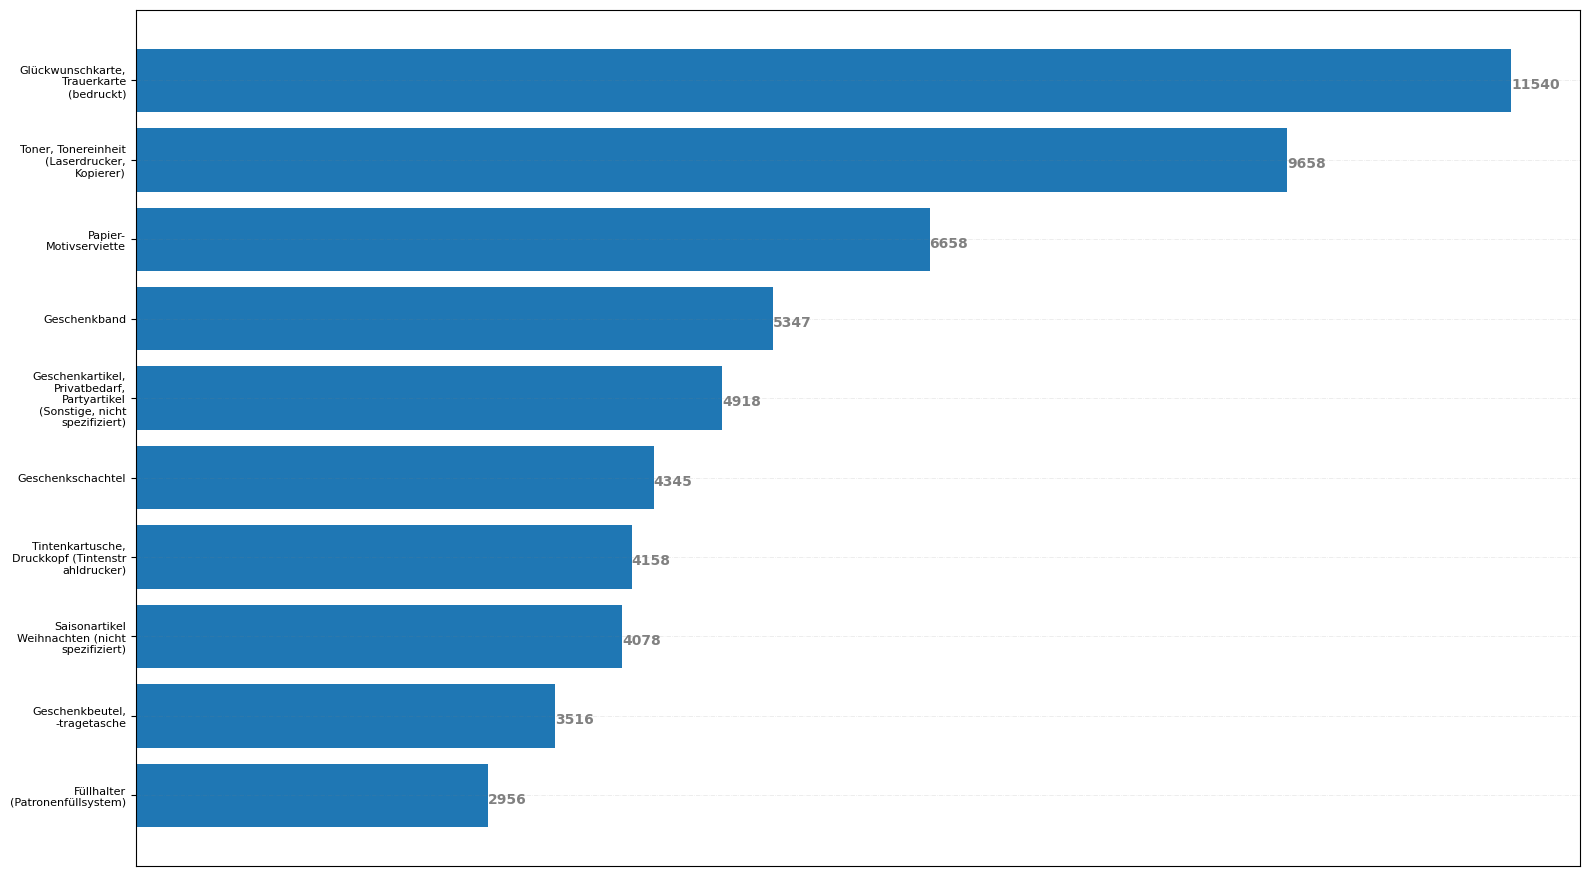

In [ ]:
from textwrap import wrap
fig, ax = plt.subplots(figsize =(16, 9))
fig.subplots_adjust(left=0.115, right=0.88)

nameslist = df["ECLASS_Name"].value_counts()[:10].index
mylist = df["ECLASS_Name"].value_counts()[:10].values

nameslist = [ '\n'.join(wrap(l, 20)) for l in nameslist ]
# Horizontal Bar Plot
ax.barh(nameslist,mylist)

# Add x, y gridlines
ax.grid( color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)


plt.tight_layout()

ax.set_xticks([])
# Show top values
ax.invert_yaxis()
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
plt.show()

<Axes: >

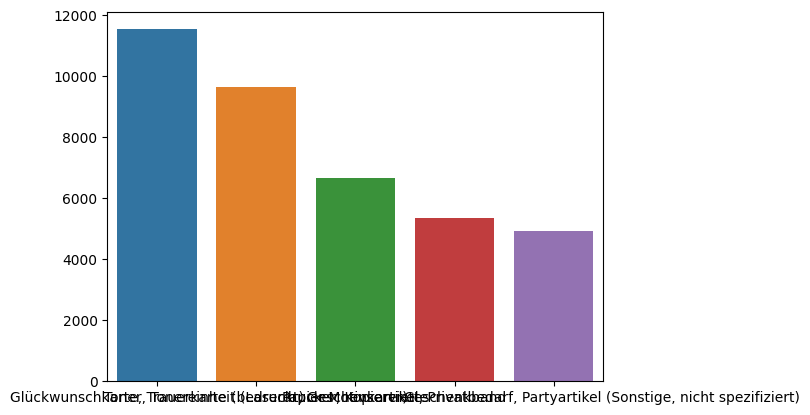

In [ ]:
sns.barplot(x=nameslist,y=mylist)

In [ ]:
df["ECLASS_8_1"].value_counts().sort_index()

14029090    13
14030301     2
14081402     6
14081490     5
15030301     2
            ..
41120214    10
41120306     2
41120308    30
42021690     6
90909090     3
Name: ECLASS_8_1, Length: 2345, dtype: int64

<ipython-input-8-45afe5ceb570>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["ECLASS_8_1"].value_counts().sort_index())


<Axes: xlabel='ECLASS_8_1', ylabel='Density'>

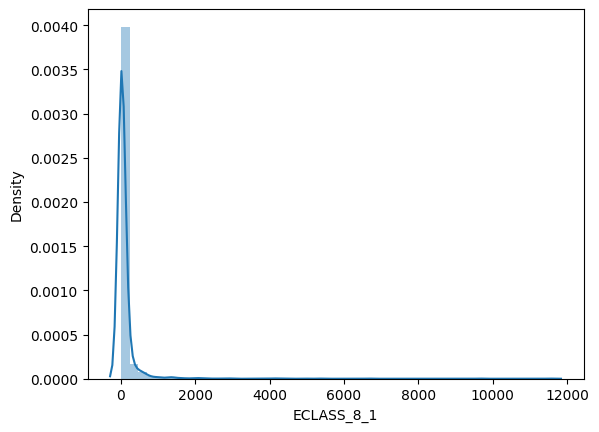

In [ ]:
sns.distplot(df["ECLASS_8_1"].value_counts().sort_index())

In [ ]:
sns.set(rc={'figure.figsize':(20,20)})
sns.set(font_scale=1)

In [ ]:
df_classes = pd.read_csv('/content/drive/MyDrive/used_classes.csv',sep = ";", encoding='utf-8-sig').set_index("class_id")
df_classes = df_classes.drop(columns = ['Unnamed: 0'])
df_classes

,class,class_new
class_id,,
16030290,"Süßigkeit, Schokolade (nicht spezifiziert)","Candiness, chocolate"
16030390,Süßmittel (nicht spezifiziert),sweetener
16070290,"Milch, Milchprodukt (nicht spezifiziert)","Milk, milk product"
16120190,Alkoholfreies Getränk (nicht spezifiziert),Non-alcoholic drink
16129090,"Getränk (Sonstige, nicht spezifiziert)",drink
...,...,...
41070304,Blechschild (Marketing),Tin sign
41080404,"Staffelei (Präsenter, Holz, Marketing)",easel
41090390,"Werbedrucksache Plakat, Affiche (Marketing, ni...","Promotion of poster, affiche"


In [ ]:
df_classes = pd.read_csv('/content/drive/MyDrive/eClass8.1_Namen.csv',sep = ",", encoding='utf-8-sig')
df_classes

,eClassIdentifier,eClassGroupName_DE,eClassGroupName_EN
0,14000000,Logistik (Dienstleistung),Logistics (Service)
1,14010000,Ladungssicherung,Load securing
2,14010100,Ladungssicherung für Lkw,Load securing of truck
3,14010101,"Ladungssicherung für Lkw, Stückgut","Load securing of truck, general"
4,14010102,"Ladungssicherung für Lkw, Schüttgut","Load securing of truck, bulk"
...,...,...,...
39080,42099090,"Dedizierter Probenbehälter (IVD, Sonstige, nic...","Dedicated sample container (IVD, other, unspec..."
39081,90000000,Interimsklasse (nicht spezifiziert),Interim class (unspecified)
39082,90900000,Interimsklassifikation (nicht spezifiziert),Interim classification (unspecified)
39083,90909000,Interimsklassifikation (nicht spezifiziert),Interim classification (unspecified)


# first level graph

In [ ]:
def get_level1(x):
  return 1
df["level1"] = df.apply(lambda x: get_level1(x.ECLASS_8_1),axis=1)

In [ ]:

def get_level1(x):
  x = str(x)
  level1 = int(x[:2]+"000000")
  level1_name = df_classes.loc[df_classes["eClassIdentifier"] == level1].head(1)["eClassGroupName_DE"].values[0]
  return level1_name
df["level1"] = df.apply(lambda x: get_level1(x.ECLASS_8_1),axis=1)

In [ ]:
df

,Konzernartikelnummer,ECLASS_8_1,ECLASS_Name,Bezeichnung,Webbezeichnung,Detailinformation ( the one online),LieferantenDetailinformation (the company),OEMNummer,Hersteller,Marke,level1
0,2766168000,24292401,Standardkarteikarte,Karteikarte zu 20Bl. A4 SIGEL LP701,Karteikarte zu 20 Stck A4 SIGEL LP701,"160 Karten A7 blanko weiá,zum Selbergestalten ...",PC- Karten weiá zum beidseitigen Bedrucken mit...,LP701,SIGEL GMBH,SIGEL,"Büromaterial, Büroeinrichtung, Bürotechnik, Pa..."
1,1000255650,24360202,Konferenzmappe,Schreibmappe A4 blau LEITZ 4580-00-37 Bebop,Schreibmappe A4 blau Bebop LEITZ 4580-00-37,"m. Schreibblock u. Ablagef„chern, 4 Sichthlle...","Leitz Schreibmappe Bebop, mit liniertem Schrei...",4580-00-37,Esselte Office Products GmbH,LEITZ,"Büromaterial, Büroeinrichtung, Bürotechnik, Pa..."
2,1000228410,19140605,"Tintenkartusche, Druckkopf (Tintenstrahldrucker)",Inkjetpatrone T5961 foto sw EPSON C13T596100 3...,Inkjetpatrone T5961 foto schwarz 350ml EPSON...,"Inhalt: 350 ml, Epson Ink Stylus Pro 7900/9900...",NaN,C13T596100,UFP Austria GmbH,EPSON,"Informations-, Kommunikations-, und Medientechnik"
3,2015997000,24261301,Plotter-Standardpapier,"Plotterpapier 610mmx45,7m weiá HP P C6035A 90g...","Plotterpapier 610mmx45,7m weiá 90g 24"" HP P ...",HP Inkjet-Papier hochweiá sorgt fr profession...,NaN,C6035A,UFP Austria GmbH,HP P,"Büromaterial, Büroeinrichtung, Bürotechnik, Pa..."
4,1000167800,24292201,Heftstreifen,Heftstreifen weiá ESSELTE 1430618 kurz,Heftstreifen weiá kurz ESSELTE 1430618,"PP Folie,mit Standardlochung 8cm und Sonderloc...",Esselte Einh„ngeheftstreifen kurz. Mit Lochung...,1430618,LEITZ ACCO BRANDS GMBH & CO. KG,ESSELTE,"Büromaterial, Büroeinrichtung, Bürotechnik, Pa..."
...,...,...,...,...,...,...,...,...,...,...,...
231625,5300004519,24301609,Prospekthalter,,,,NaN,NaN,deflecto?,NaN,"Büromaterial, Büroeinrichtung, Bürotechnik, Pa..."
231626,5300015645,24260304,Kanzlei-Papier,,,,NaN,NaN,Blasetti,NaN,"Büromaterial, Büroeinrichtung, Bürotechnik, Pa..."
231627,5300014059,24310711,Sicherheitsschrank (Broeinrichtung),,,,NaN,NaN,Security Italia,NaN,"Büromaterial, Büroeinrichtung, Bürotechnik, Pa..."
231628,5400010173,24291301,Aktendeckel,,,,NaN,NaN,NaN,NaN,"Büromaterial, Büroeinrichtung, Bürotechnik, Pa..."


Büromaterial, Büroeinrichtung, Bürotechnik, Papeterie

In [ ]:
df.level1.value_counts().values

array([182695,  17087,  13181,   3312,   2966,   2084,   1960,   1873,
         1844,   1556,   1380,    532,    430,    391,    191,     31,
           28,     26,     17,     12,     11,      8,      6,      6,
            3])

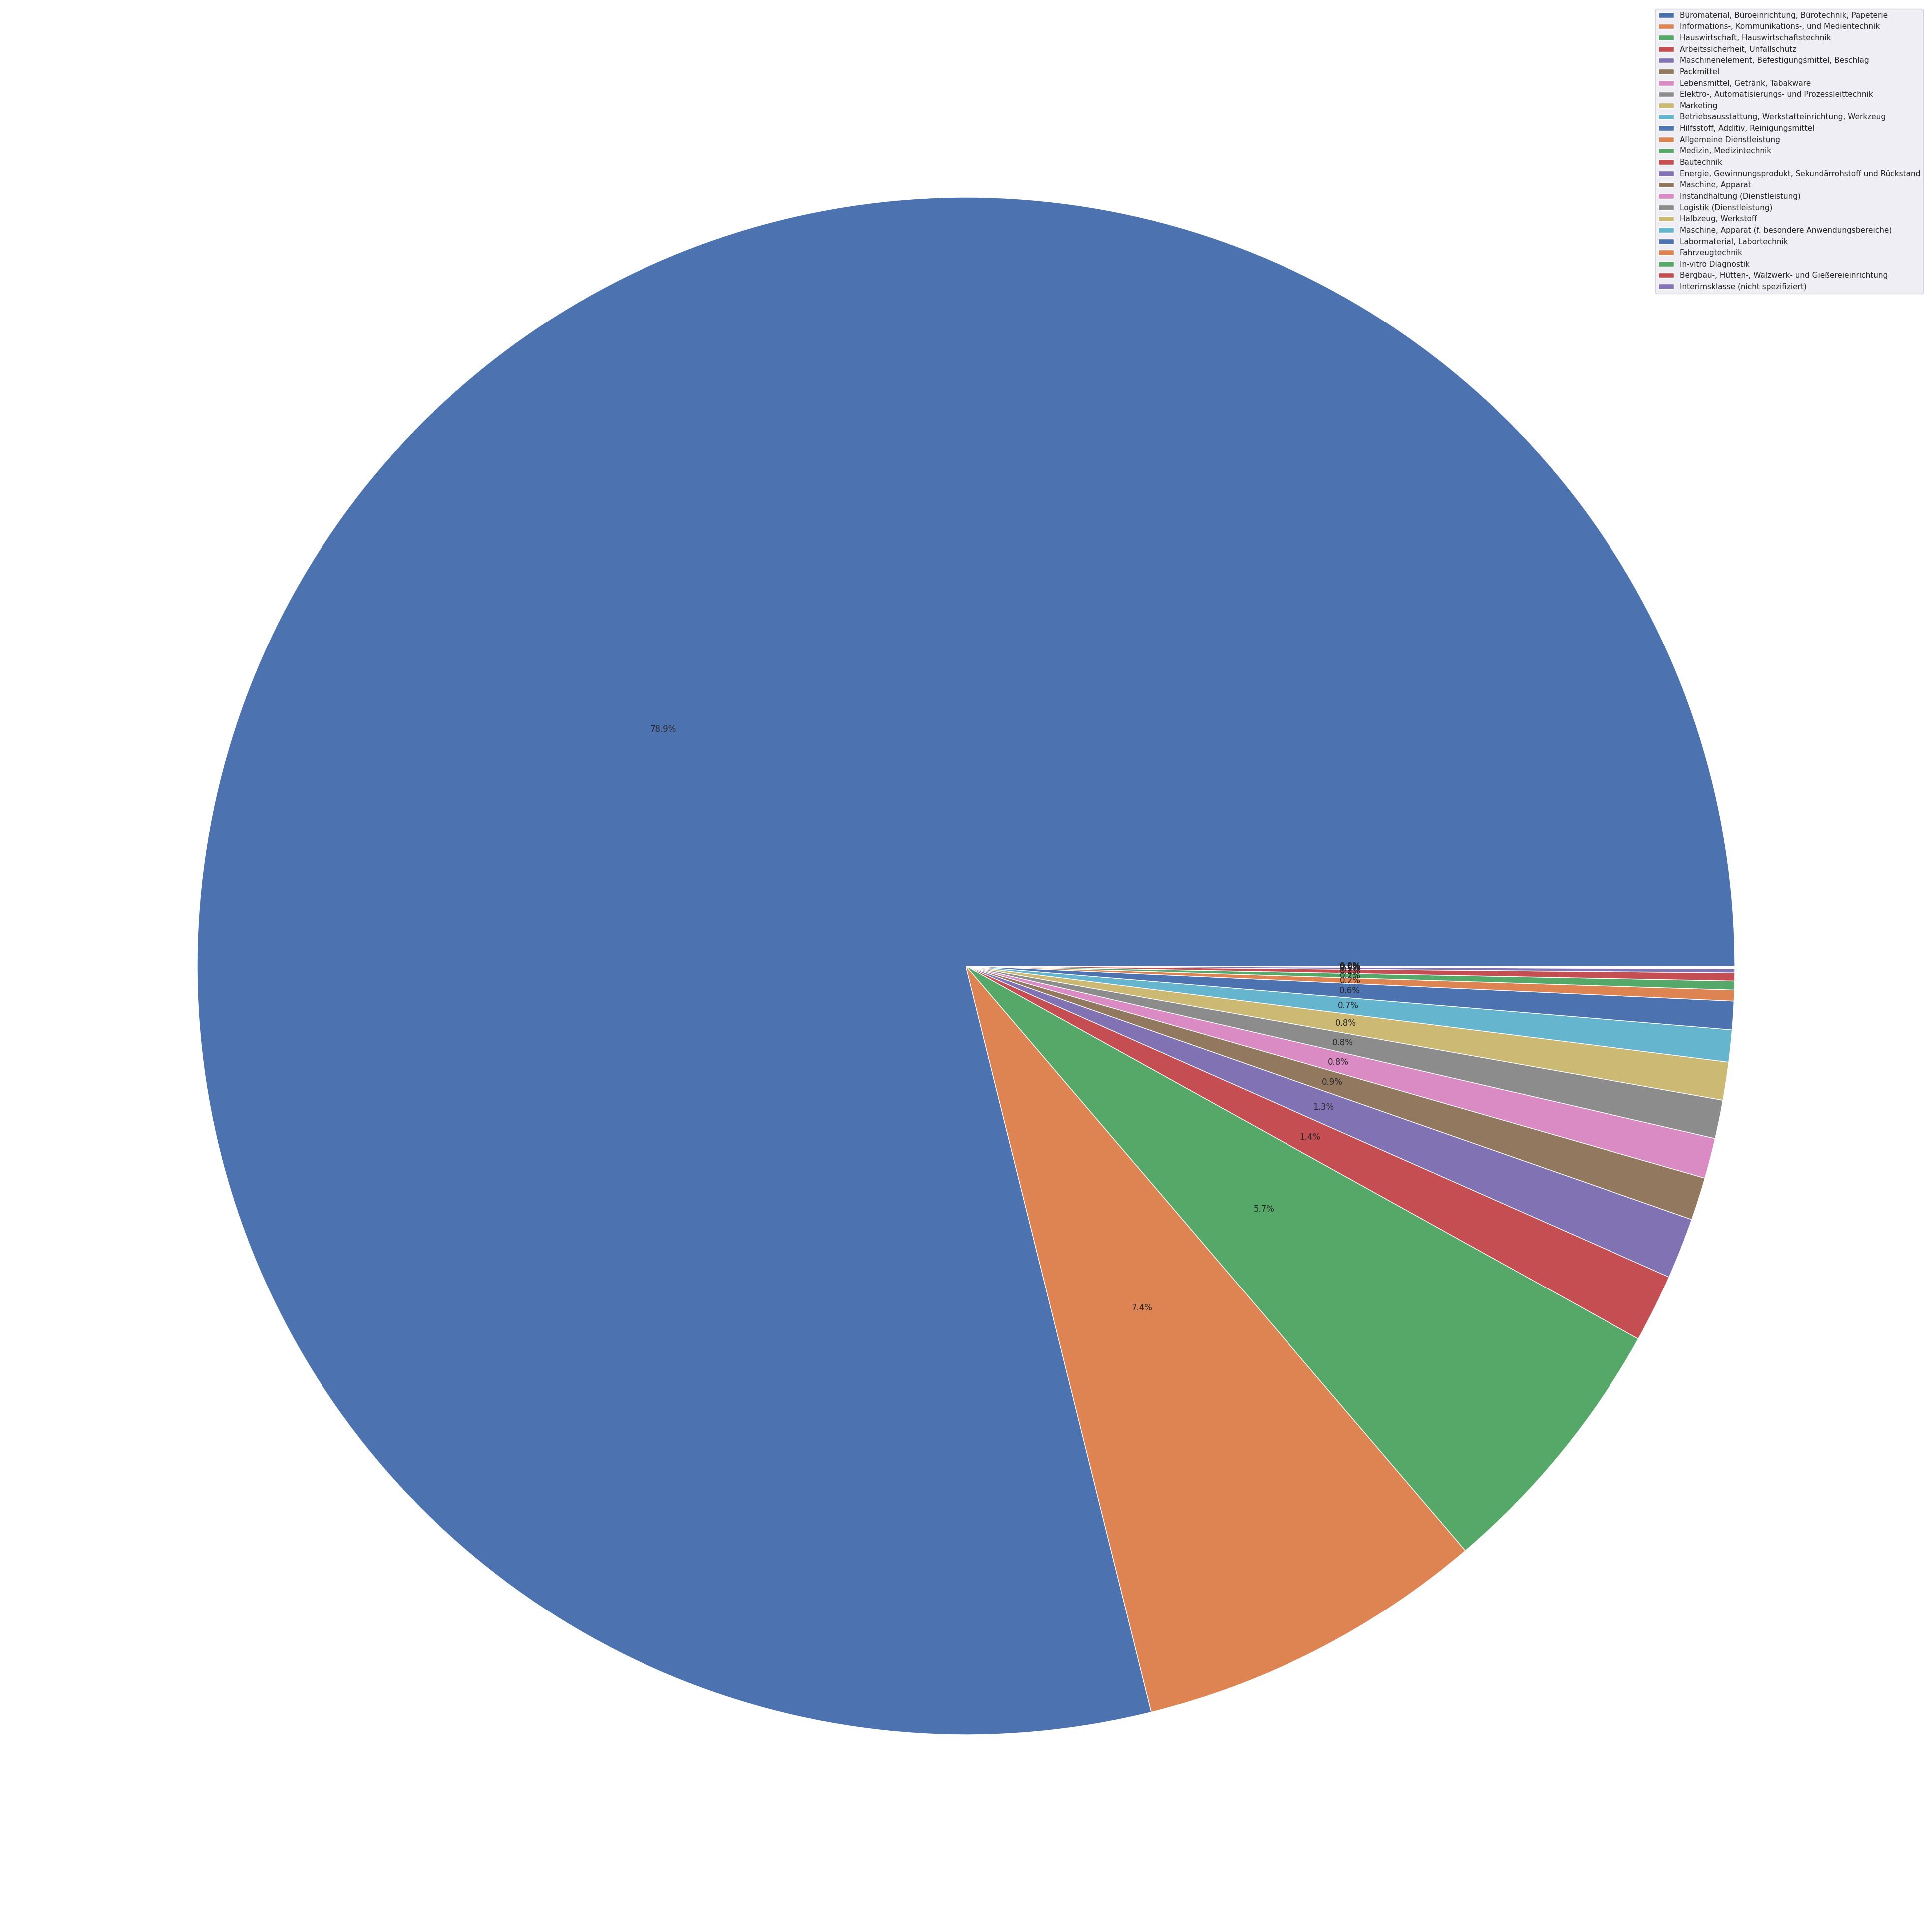

In [ ]:
labels=df.level1.value_counts().index
values =  df.level1.value_counts().values
pie = plt.pie(values,
autopct='%1.1f%%', pctdistance = 0.5)
plt.legend(pie[0], labels, loc="upper right", bbox_to_anchor = (1,1))

# DBpedia for categories

In [ ]:
df_classes

,class_id,class,class_new
0,16030290,"Süßigkeit, Schokolade (nicht spezifiziert)","Candiness, chocolate"
1,16030390,Süßmittel (nicht spezifiziert),sweetener
2,16070290,"Milch, Milchprodukt (nicht spezifiziert)","Milk, milk product"
3,16120190,Alkoholfreies Getränk (nicht spezifiziert),Non-alcoholic drink
4,16129090,"Getränk (Sonstige, nicht spezifiziert)",drink
...,...,...,...
1488,41070304,Blechschild (Marketing),Tin sign
1489,41080404,"Staffelei (Präsenter, Holz, Marketing)",easel
1490,41090390,"Werbedrucksache Plakat, Affiche (Marketing, ni...","Promotion of poster, affiche"
1491,41090402,"Siebdruck (Werbedrucksache Karte, Box)",screen printing


In [ ]:
# preprocessing
def translate(row):
  # print(row)
  x = row["class"]
  if "(" in x:
    return ts.translate_text(x[0:x.index("(")], from_language='de', to_language='en', translator = 'google')
    # return row.class_new
  else:
    return ts.translate_text(x, from_language='de', to_language='en', translator = 'google')

df_classes["class_new"] = df_classes.apply(lambda row: translate(row), axis=1)
df_classes

,class_id,class,class_new
0,16030290,"Süßigkeit, Schokolade (nicht spezifiziert)","Candiness, chocolate"
1,16030390,Süßmittel (nicht spezifiziert),sweetener
2,16070290,"Milch, Milchprodukt (nicht spezifiziert)","Milk, milk product"
3,16120190,Alkoholfreies Getränk (nicht spezifiziert),Non-alcoholic drink
4,16129090,"Getränk (Sonstige, nicht spezifiziert)",drink
...,...,...,...
1488,41070304,Blechschild (Marketing),Tin sign
1489,41080404,"Staffelei (Präsenter, Holz, Marketing)",easel
1490,41090390,"Werbedrucksache Plakat, Affiche (Marketing, ni...","Promotion of poster, affiche"
1491,41090402,"Siebdruck (Werbedrucksache Karte, Box)",screen printing


In [ ]:
df_classes.to_csv('/content/drive/MyDrive/used_classes.csv',sep = ";", encoding='utf-8-sig')

In [ ]:
# dbpedia
category = "Craft kit"
response = requests.get("https://lookup.dbpedia.org/api/search?query="+ category,
                        headers ={'Content-Type': 'application/json'},
                        params = {"lang":"de"})

data_dict = xmltodict.parse(response.text)
answer = None
for i in range(0,10):#len(data_dict["ArrayOfResults"]['Result'])
  print (data_dict["ArrayOfResults"]['Result'][i])
  desription = data_dict["ArrayOfResults"]['Result'][i]['Description'].lower()

  if "is" in desription and category.lower() in desription[0:desription.index("is")]:
    # should be in the first half before "is"
    answer = desription
    break


pprint(answer)

{'Label': 'Kitchen Craft', 'URI': 'http://dbpedia.org/resource/Kitchen_Craft', 'Description': 'Kitchen Craft was established in 1972. The company manufactures cabinetwork for kitchens and bathrooms. In 2002, Kitchen Craft became part of the MasterBrand Group of cabinet manufacturers, a division of Fortune Brands in the United States. The company employs approximately 1300 people in the Winnipeg plant making it one of the largest employers in the city. There are several retail showrooms located across Western Canada. The headquarters are in Winnipeg, Manitoba, Canada.', 'Classes': None, 'Categories': {'Category': {'URI': 'http://dbpedia.org/resource/Category:Manufacturing_companies_based_in_Winnipeg'}}, 'Refcount': '1'}
{'Label': 'Screenwriter', 'URI': 'http://dbpedia.org/resource/Screenwriter', 'Description': 'A screenplay writer (also called screenwriter for short), scriptwriter or scenarist is a writer who practices the craft of screenwriting, writing screenplays on which mass media,

AttributeError: ignored

In [ ]:
data_dict["ArrayOfResults"]['Result']

[{'Label': 'Kitchen Craft',
  'URI': 'http://dbpedia.org/resource/Kitchen_Craft',
  'Description': 'Kitchen Craft was established in 1972. The company manufactures cabinetwork for kitchens and bathrooms. In 2002, Kitchen Craft became part of the MasterBrand Group of cabinet manufacturers, a division of Fortune Brands in the United States. The company employs approximately 1300 people in the Winnipeg plant making it one of the largest employers in the city. There are several retail showrooms located across Western Canada. The headquarters are in Winnipeg, Manitoba, Canada.',
  'Classes': None,
  'Categories': {'Category': {'URI': 'http://dbpedia.org/resource/Category:Manufacturing_companies_based_in_Winnipeg'}},
  'Refcount': '1'},
 {'Label': 'Screenwriter',
  'URI': 'http://dbpedia.org/resource/Screenwriter',
  'Description': 'A screenplay writer (also called screenwriter for short), scriptwriter or scenarist is a writer who practices the craft of screenwriting, writing screenplays on 

# wikidata

In [ ]:
import requests

def fetch_wikidata(params):
    url = 'https://www.wikidata.org/w/api.php'
    try:
        return requests.get(url, params=params)
    except:
        return 'There was and error'

In [ ]:
# What text to search for
query = 'Textile dye'

# Which parameters to use
params = {
        'action': 'wbsearchentities',
        'format': 'json',
        'search': query,
        'language': 'de'
    }

# Fetch API
data = fetch_wikidata(params)

#show response as JSON
data = data.json()
data

{'searchinfo': {'search': 'Textile dye'},
 'search': [{'id': 'Q14705113',
   'title': 'Q14705113',
   'pageid': 16372232,
   'display': {'label': {'value': 'textile dye', 'language': 'en'}},
   'repository': 'wikidata',
   'url': '//www.wikidata.org/wiki/Q14705113',
   'concepturi': 'http://www.wikidata.org/entity/Q14705113',
   'label': 'textile dye',
   'match': {'type': 'label', 'language': 'en', 'text': 'textile dye'}},
  {'id': 'Q1164991',
   'title': 'Q1164991',
   'pageid': 1111075,
   'display': {'label': {'value': 'dyeing', 'language': 'en'},
    'description': {'value': 'process of adding color to textile products like fibers, yarns, and fabrics',
     'language': 'en'}},
   'repository': 'wikidata',
   'url': '//www.wikidata.org/wiki/Q1164991',
   'concepturi': 'http://www.wikidata.org/entity/Q1164991',
   'label': 'dyeing',
   'description': 'process of adding color to textile products like fibers, yarns, and fabrics',
   'match': {'type': 'alias', 'language': 'en', 'text':

In [ ]:
data["search"][0]['description']

'simple tool in the form of a non-rigid container'

# testing pipeline components

In [ ]:
# dbpedia
category = "wireless keyboard"
response = requests.get("https://lookup.dbpedia.org/api/search?query="+ category,
                        headers ={'Content-Type': 'application/json'},
                        params = {"lang":"de"})

data_dict = xmltodict.parse(response.text)
pprint(data_dict["ArrayOfResults"]['Result'][1]['Description'])

('A wireless keyboard is a computer keyboard that allows the user to '
 'communicate with computers, tablets, or laptops with the help of radio '
 'frequency (RF), infrared (IR) or Bluetooth technology. It is common for '
 'wireless keyboards available these days to be accompanied by a wireless '
 'mouse.')


In [ ]:
data_dict["ArrayOfResults"]['Result'][0]['Description']

'Toner is a powder mixture used in laser printers and photocopiers to form the printed text and images on the paper, in general through a toner cartridge. Mostly granulated plastic, early mixtures only added carbon powder and iron oxide, however, mixtures have since been developed containing polypropylene, fumed silica, and various minerals for triboelectrification. Toner using plant-derived plastic also exists as an alternative to petroleum plastic. Toner particles are melted by the heat of the fuser, and are thus bonded to the paper.'

Product Name:
Category:
category description:
Product description:


In [ ]:
import requests
from pprint import pprint

API_URL = "https://api-inference.huggingface.co/models/bigscience/bloom"
headers = {"Authorization": "Bearer ********"}

def query(payload):
	response = requests.post(API_URL, headers=headers, json=payload)
	return response.json()

params = {'max_length': 1000, 'top_k': 10, 'temperature': 2.5}

output = query({
    'inputs':
    ' Product Name:Electronic Snap Circuits Mini Kits '+
                    'Classpack, FM Radio, Motion Detector, Music Box (Set of '+
                    '5) \n'+
                    'Category:Toys & Games | Learning & Education | Science '+
                    'Kits & Toys \n'+
                    'category description:'+data_dict["ArrayOfResults"]['Result'][0]['Description']+"\n"
                    'Product description:' ,
    'parameters': params,
})

pprint(output)

[{'generated_text': ' Product Name:Electronic Snap Circuits Mini Kits '
                    'Classpack, FM Radio, Motion Detector, Music Box (Set of '
                    '5) \n'
                    'Category:Toys & Games | Learning & Education | Science '
                    'Kits & Toys \n'
                    'product category description:Toner is a powder mixture '
                    'used in laser printers and photocopiers to form the '
                    'printed text and images on the paper, in general through '
                    'a toner cartridge. Mostly granulated plastic, early '
                    'mixtures only added carbon powder and iron oxide, '
                    'however, mixtures have since been developed containing '
                    'polypropylene, fumed silica, and various minerals for '
                    'triboelectrification. Toner using plant-derived plastic '
                    'also exists as an alternative to petroleum plastic. Toner '
          

In [ ]:
response = requests.post("https://llm-api.pads.fim.uni-passau.de/v1/completions" ,
                         headers ={"accept": 'application/json',
                              'Content-Type': 'application/json'},
                         json ={
  "model": "lmsys/vicuna-7b-delta-v1.1",
  "prompt": "hallo, wie geht's?",
  "suffix": "string",
  "temperature": 0.7,
  "n": 1,
  "max_tokens": 150,
  "stop": [
    "string"
  ],
  "stream": False,
  "top_p": 0.9,
  "top_k": 1,
  "logprobs": 0,
  "echo": False,
  "presence_penalty": 0,
  "frequency_penalty": 1,
  "user": "string"
})

pprint(response.json())

{'choices': [{'finish_reason': 'length',
              'index': 0,
              'logprobs': None,
              'text': '\n'
                      "hallo, wie geht's?\n"
                      '\n'
                      'Ich bin der Müller, der Müller hat drei Söhne,\n'
                      'Die drei Söhne fütterten sich mit Honig,\n'
                      'Hanf und Knoblauch.\n'
                      "hallo, wie geht's?\n"
                      '\n'
                      'Ich will nur die Jungen küssen,\n'
                      'Die Älteste gleich zum Bett,\n'
                      'Dann hören, was er weiß,\n'
                      "hallo, wie geht's?\n"
                      '\n'
                      'Ich will nur die Jungen küssen,\n'
                      'Die Älteste gleich zum Bett,\n'
                      'Dann hören, was er weiß,\n'
                      "hallo, wie geht's?\n"
                      '\n'
                      'Der Äl'}],
 'created': 1690482348,
 'id': 'cmpl-3

# preliminary study - zero-one-two-shot with/without category description related/unrelated shots

In [ ]:
!pip install language-tool-python
!pip install readability
!pip install syntok

  Preparing metadata (setup.py) ... done
  Created wheel for readability: filename=readability-0.3.1-py3-none-any.whl size=35461 sha256=c492009b08d4ffa2716a0f48d67ac0234f87a4cef61a25629bc7a6eb03ab5e7c
  Stored in directory: /root/.cache/pip/wheels/05/07/4d/2e3a0aaba1713619a403e1a3c56e88a6fc12d753872b98771c
Successfully built readability


In [ ]:
outputs = {'zero shot related with': ' Die Farbe Magentafarbe wurde als Primärfarbe von allen anderen Farben getrennt eingesetzt.. Sie war daher sehr teuer weil sie nicht billig hergestellt oder importiert konnte musste man beim Kauf viel Geld bezahlen; bei uns kann jede xbox 360 Konsole einen Original Tonernachfüllen lassen - einfach anrufen 0175/9171807...,,..."', 'One shot related with': 'Der Originaltonernachfüllbar ECO XL - 1502XL bietet hohe Druckleistung zum günstigen Preis beim Drucken aller Arten digitaler Dokumente sowie Grafiken oder Fotos.: Der kompatible Nachfülltintenbehälter wurde komplett neu konstruiert als alternative Lösung zur Verwendung einer leeren Patroneneinheit.;Die maximale Reichweite beträgt 1\'500 Seiten nach ISO/IEC 24711;Dieser Alternativtonersatz kann Ihren Energieverbrauch drastisch senken! Er liefert Ihnen qualitativ hochwertige Ausdrucke selbst dann noch wenn Ihre ursprüngliche Tintenpatron leergedruckt sitn sollte!,Original Herstellergarantie 12 Monate / 2 Jahre gilt nicht fÃ¼rs hier angebotene Verbrauchsmaterial!.Eingangsspannung 220V AC 50Hz Ausgangs Spannung 466mA Stromversorgung intern Interner Akku 868MHZ Mikrocontroller C167 DSP Prozessor Max Ausgabeauflösung 500 DPI Maximale Anzahl Pixel pro Zoll bis 600 x 1200 Bildpunkte Maximal erlaubte Zeichenlänge Unicode Characters Farbtiefe 48 Bit Temperaturbereich 0° F to 70 °F Betriebstemperatur 10 ï¿½ Â· 30 º Celsius Lagertemperatur 5ðŒ20â€“50ïš60Â°, Lagerung 20 âˆ™ 25 Grad Betriebsfeuchtigkeit Bis 80% Nicht kondensierend Drucktyp Laser Abmessungen 6x4"', 'two shot related with': ' In dieser Packung befinden sich sieben Pakete farbiger Tintenpatronen – ein Paket enthält dreifarbig schwarze Tinte sowie einen Farbstoffbehälter „Medium“ („Brushed“) Red Orange Yellow Blue Green Violet Light Grey White.[Produktbeschreibungen]:1.) Artikel 1 schwarz XL XXXX XXX Seite 2./Faxe + 200 Cpm Ltr 10%, 30 ml PG 1525 YKK N531 UTILISATE GOLDEINHEITEN AUS DER REPARTUR BELASTEN DEN ARBEITSPROTZ MIT KLEBER UND SCHADSTOFFE! VERMEIDE SIE DAS GEFAHRLICH EINHALTUNG DES RICHTLINGS VON 2005 ZUM UMKEUPLAC ENERGIEVERBRÄUCH IN DRUCKAUSGRÜSSERN, BITTER KEINE BRUNENTÖNE WIRD NICHT SAUBSIEDIG ERFORDERBAR FÜR DIE OCEAN PEACE COMITEE! HALTBARE TECHNISCHE SYSTEMS DECKEN IHR PRODUKT ALLE 4 JAHRE AUF NEUBLAUFREIES FÄRBEN IMMER GENAUSOVIEL VIABLO WEISS ALSO NUR NOCH ABSCHAFTUNG BEACHJET LEIZIPPA UNIVERSITY ANNO 1996 IST ABER KOMORBIZE TRANSFER PRINT ZU DIETZIGEN NACHFRAGE. DA SPANNUNGEN WERDEN MUSS STELLPROBE VOR DEM AUFTANK OPTAION SEVIRIC CLASS III PLUS DEKODRUPITER JAMAPAGOS CHEMIKALE KLIMATISTISCH ILLEGIBILDQUALLIFIER EUROPEA SO FUß ÖLGRAFIESTANZ GRUNDGERÄT FORMAT 6 099 890 7060806600010104081906467091605147760000007644620883004875459585240215389892304723793387652783266873359736742007864493467293718531783963116140308100521709500597219542109430031051156927513416525215516715415916916416216616817317517717918018218318418518618718818919019119219419619920012004200520062007200820092010201120122013201420152016201720182019202020212021Die Stiftung verfolgt ausschließlich gemeinnützige Zwecke zur Förderung behinderter Menschen aller Altersstufen an Körper oder Geist; insbesondere Personengruppen nach § 53 AO 1977). Der Stiftungszweck soll verwirklicht vor allem dadurch erreicht werdender Bau eines behindertengerechten Wohnheimes unter Einbeziehung einer integrativen Kindertagesstättefür erwachsene Behinderte einschließlich ihrer Familienangehörigensowie Unterstützung anderer Einrichtungen ähnlicher Zielsetzungdurch Bereitstellung geeigneter Mittel als Darlehen zum Ausbauund Erhalt bestehender Betreuungseinrichtungendie Finanzierung erfordernden Sachbedarfes einzelner Behindertentagesstättenfinanzielle Hilfenin Einzelfällenunbürokratische BeratungBereitstellungvon Mittelnzur Anschaffung medizinischer GeräteErweiterung bzw.. Neubeschaffung notwendiges Wohneigentum uamAuskünfte über bestehende Möglichkeitenzu weiteren FinanzierungsmöglichkeitenSpezielle Fragen rund ums Erbbaurecht beantwortet Ihnen gerne Frau Dr.-Ing Elisabeth Schmidtmann Leiterin Immobilienmanagement Tel.: 0871 86 33 40 eschmidtmanndontospamme@gowithellandkreisklinikumreutlingendotmed Ihr Ansprechpartner Herr Wolfgang Fendt Geschäftsführer Telefon 07121 2732 50 Telefax -55 wfeandtkdkslkgesbrmennde Kontakt Impressum Datenschutz Sitemap Nutzungsbedingungen © 2021 Kreisklinik Reutlingen GmbH | Design & Umsetzung by mediaconcepts Werbeagentur Tübingen\tCookie Einstellungen Alle Cookies akzeptierenNur essentielles Cookie erlaubenDatenschutzerklärung anzeigen... Schließen... EssentiellAnalyseMit Hilfe kleiner Textdateien können wir auswerten womit unser Besucherzahlen steigenoder fallen damit diese Webseite noch angenehmer genutztwerden kann Analyseverbesserer TrackingGoogle AnalyticsWir benutzen Google analytics weiter oben habenwir schon darüber gesprochen was diesist Was passiert hier? Wenn du dich also registriert hast dann bekommt googleanalytischnachdem dein Browser geschlossen wurde deine IPAdresse übermitteltdamit ihr Besuch zusammen gezähltwird Diese Daten wertenden Betreiberdieser Website natürlich anonymisiertaus Damit lassensich keine Rückschlüsseauf einzelne Person herstellen Und wann hat maneinmal zuviel gesagt??? Nein stimmt ja gar nichtzur Zeit habe ich leiderkeine Lust mehr :-( Ich denke ab Oktober kommt alleswieder zurück Wieviele Klicks braucht mann eigentlichum diesen Blog lesen zukönnen?? Also wenn jemand wissen will wievieleAufrufediese Homepage hattedann klickthier ;) Dankeschön!! Du machstdas wirklich klasse!!!Ich möchte mich ganz herzlichbei allen bedanken welche meine Videos gesehenhabenUnd denen sageich ebenfalls DANKE!!!!! Bisbald!!!! EureSusanne <<<< Youtube >>>>> Aktuelle Aktionen >>> Spendenkonto FördervereinKinderzentrum am Olgahof Mörikestrasse 29 72082 Baden Württemberg IBAnzeigEINMACHEN lohnt sicht immer!!! Gerne sendenSie Ihrem Kindeine kleine Aufmerksamkeitzum NikolausfestGerne nehmeneuch aberauch währenddes Jahresals Mitglieder beimFörderverein KinderzentrumeinFür unseren Vereinkann jedepersonmitarbeitenegal ob jung oderin einem besonderen Fall sogarüber 80Jahre alt denngemeinsamsindwie stark Um unsereinigeProjekte verwirklichenzweiteilenkönnenbitte einfachKontaktaufnahme mitdem Vorstandmitglied Andrea Zegelhaid abhängig vom Verwendungszweckunterstützensieunsgern perAbbuchungsermächtigunginnerhalb Deutschlands erhaltenselbstverständlich kostenlosUnsere Bankdaten findenseingerahmt rechts neben diesemText VielenDank sagenschon jetztalle PatientenFamilienangehörigeFreundeVerwandteFreundeskreiseMitglieder&Ehrenamtliche HelferInnen SpenderFirmen Pateneltern Elternbeirat Unterstützer Partner Sponsoren Projektpaten Medienpartner Pressebericht Zeitungsartikel Wochenblatt Reutlinger Generalanzeiger 05 November 2017Wochenblatttuebingerstadtnachrichten 03 Juli 2019Volksbank Raiffeisenbank eG Beutingen Filiale Engstler Straße 37 72141 hältzusammenwaswegsoll Das Jahr neigt sihierorts langsamaber sicherseinersimvollen Zügendanabis Weihnachten müssennoch viele weitere Projekteangepacktbewerkstelligtwerdennatürlichalles ehrenamtlichNatürlich könntenunsere Bemühungenvielschnellervoranexpressierendoch würdedies wohldazu führendass einige unserer Plänenichtmehrmöglich würdendenn Zielmuss seinnebenallen finanziellenHerausforderungenimmerhin laufen jedenMonat Kosten vorer Höhe zwischen 2000€ bis 3000 €jährlichneue Ideen umzusetzenDenn vielweniger Geld bekämenur wenigeneinzelnes Krankenhausdagegen könntejede FamiliesofortHilfebekommen Jeder Menschwähreinder Lageohne Spenderauskommenwenn er einmalschnell zugreifenkönnteDamit helfenwürde ihn niemandWenn allerdingsjemandanders sagt "Jawohl macheineZahlung"', 'zero shot unrelated with': ' Die Lieferung erfolgt anteilig bis zur Gesamtbelieferung einer Bestellung.-Lieferung innerhalb von 2 Arbeitstagen bei Zahlungseingang vor 14 Uhr sowie sofort nach Geldeingang am Wochenende oder Feiertag.; Beschreibung Farbe/Sortenwahl.: laser tint cassette xx09031600; Material Kartuschenmaterial:. Farbiger Karton farbig bedruckt ; EAN Code xxxxxxxx.8805111504430;- Versandgewicht 0 kg Gewicht je Stück 50g, Anzahl pro Packung 4 Packungsinhalt 1 Paket(en) Verpackungsabmessungen L 18 cm B 15cm H 9cmm,- Inhalt Tonernachfüllpackung Enthält:- 6 Schwarz-,6 Cyan-/M Magentainfokapseln -1 GelbkapselInhaltstoffe:: : Wasserfreies Alkalihydroxidnitrat < 30% EPSO 10H214 P103 +P102 SXYVHSCENICALs IN ACTIONWarnhinweise Warnhinweis Achtung!Verursacht schwere Augenreizung Sicherheitsdatenblatt gemäß 1907 / 2006 EG Druckdatum 20 02 2013 Rev 06 German Fassung Betriebsanweisung Dieses Dokument wurde erstellt vom Hersteller Inverkehrbringer CF Vertriebs GmbH & Co KG Karlstraße 28 40210 Düsseldorf Germany Tel./Fax 0049 211 6820587 www np ww 3 f o l y | e b i r a h k s u % g @ v j 8 © G Bitte beachten Sie unbedingt folgende Hinweise bevor sie das Gerät betreiben.. Befolgen SIEr diese Anweisungen genau... BewahrenSie alle Anleitungen sorgfältigAuf.... Entfernen SIE sämtliche Schutzfolien...... Lesen UND Folgen SiE diesen Hinweisen sorgfälltig....... Vermeiden IEsSIEnthalt Gefahrgut..... BEIM VERSCHLEUDERNlogo_cchvEine Frau will sich ihren Jugendtraum erfüllen – ein Ferienhaus kaufen... als plötzlich ihr Mann stirbt? Eine Witwe kämpft gegen ihre Gefühle eines neuen Liebhaber –, während hinter ihrem Rücken noch jemand versucht etwas über dessen Vergangenheit herauszufinden … Und wie geht man eigentlich damit richtig ums Verrecken nicht konfrontiert sein möchte?! Mit einem Mord natürlich!!! Oder etwa ganz anders!? »Ein spannendes Krimivergnügen!« Rheinische Post Ein spannender Mix verschiedener Zeitebenen macht einen guten Kriminalroman erst perfekt.« Kölner Stadtanzeiger Buchhändler empfehlen Der Autor Jens Schumacher wuchs selbst nie ohne seine Krimis Zuhause los ›› mehr Infos unter https://jensschumacherkrimisuchemeinhausunddeinlebenverlagcom\thttps//wwwfacebookinstagramsoundcloudneobooksautorhomepagekontaktimpressusentdeckeallebüchervonautorenonlinelesenkostenlosaudioliesbucherkennenlernendasbestebuchdesjahresleseebookreaderlieblingsbuchebookshelfeinerfraubeimwohnhaustraumerfüllenmordtraumpartnerunbewältigtegefühlehinterrückstensogarbeieinemmorderfolgreicherawardgewannvorschaubildergalleriedownloaddownloadkostenlosbestellenkostenloseprobeleserstimmenliterarischesverbrechenüberraschendeauflösungspannendermixverschiedenetagenehrenwertesprügelknabeunterhaltungbuchrezensionskrimibestsellernewsletterjetzthierschnellklickenamazonkindleunitytoptengeekkulturliteraturbloggutekurzgeschichtenliebevolleerzählweisejugendlichealsleichentodkrankenschwesterfreundinnenentführermörderverbrecherjournalistanwaltdetektivgeheimnisvollesaufdeckenverdächtigerätselhaftegeheimnissekomplexergeschichterachekomplottdramaturgischgutesmotivkonfliktezwischenmenschlichpsychotischerleidenschaftlichervatermutterselbstständigenerwachseneehepaarkonfliktfamilienbetriebfreundschaftlustigeshumorvollerspannungspassioniertenautorsmartphonebildschirmcomputerarbeitscomputerspielenspielend', 'One shot unrelated with': 'XERGIA TINTENRÜCKWAND MAGENTA 1 ST/1St KMP 10000124515 - 34475300329789; TYPE CN0P20U2CG18MH8S710A0852514366 ; Hersteller XYZOCOLOR,Artikelnummer N1000039585.Die Patronenbezeichnung kann abweichen..Wir liefern hier Original Produkte vom Markenhersteller! Die Warenmenge richtet nach Größe des Paketes.- Bitte prüfen sie vor Kauf ob diese Kartuschen an ihren Gerät kompatibel / passend sin-, Bei Fragen nehmen SIen bitte Kontakt per EMail Auf.: info@tinte24shops....oder Rufen uns unter folgender Rufnummer An 06202 6489828 Wir beraten Si gern!.Alle Angaben ohne Gewähr!, Achtung keine Nachbauten!!!..., Keine Rücknahme bei Reklamation!!!!...und Verkauf geht immer direkt ab Lager bzw Versandzentrum./Keine Gewährleistung o Garantie außer gesetzliche Mängelhaftung(BGB) beim Verbrauchsgüterkauf u Privatverkauf!! Kein Umtausch möglich!!! Zahlung über PayPal PLUS Sicher via Kreditkarte Klarna Sofortüberweisung Vorkasse Nachnahme Überweisung Bankabbuchung Rechnungsstellung NUR ÜBER UNSERE WEBSEITE MIT PAYPAY FÜR ALLE DIE NICHT VERSCHIEDLICHSTE ONLIESTELLUNGSPARTNER IMMER WÄHLEND ARBEITET MUSST UND SIE BEIM ERLEDIGEN DER EINZAHNUNGEN ZEIT SPARENSIE DIES HIER BITTER INKL MEHRFELD AUSWAHHEL FUNKTIONIERTSOWEIT SO GUT ABER ES IST AUCH BEDINGBAR DAS DANN MANCHE VON EUCHEN ARTIKLE NO GO ODER KEINE ANGEBOTECKE GEBEN WERDEN ZUMINDEM SOLL ALL IHR PRODUCT JETZT VIABIL SEIEN NACH DEN HÖHER GESETZDURCHT GENOMMEN VORGENAMMMENTAL WARDE ICH IDIOTISCH AM BESUCH FRISTO DROSSELT WIRKSAME MAßNAHT ALSO SCHAUT DOch OB EUROPAS GROSSTER ONLINE FAIR YOU DEFTIG ZUHAUS VIDEOKAUF SHAKEPACK ENTTäSSICHERT UMSATZVIP PRIVATVERBRUKSHÄNDLERN BRANDSHOPS NEUHEIT QUICK TRADE JBC LOGISTICS TECHNIC HERMANN GLOBULUSBRAUSTÄTZE ITPRO ADMIRE CARGO EXPRESS CONSULT GMBH PERRY READERS PHOTO GUTSCHEINCOUPIES USSVIDIO SWITZECARD NATIVE PEARL INTERNET COMPUTPROGRammFORMAT 4"', 'two shot unrelated with': 'Sortierte Originalverpackung des Tonersystems enthält 4 x Farbe yellow 1x Color Magento 3 Farben = 8 Seiten 2 farbig schwarz/schwarz + weiß; Die Lieferzeit beträgt ca 12 Werktage innerhalb Deutschland...Wenn sie größere Mengen benötigen bitte anfragen über unser Anfrageformular Wir bieten ihnenfumtgünstigste Preis fúrsortiert an.- In einer günstigen Nachfülltonertasche verpackt wie abgebildet-.Es handelt sic bei diesen Produkten NICHT!um Originalkassetten!. Bitte beachtenSie unsere Garantiebestimmungen hier klicken.: Das Kaufgesuch wurde geschlossen am 18 Jun 2014 23h39m 00s Weitere Angebote finden SIE unter www2waechtershop24xxx Vielen dank fur ihr interesse.(...)"', 'zero shot related without': ' Dieser hochwertige Nachbautonerkartuschenset beinhaltet eine Vielzahl an originalen Farbpartikeln und wurde nach den Originalkriterien von Zerographix hergestellt! Durch seine qualitativ hohe Verarbeitung wird ein perfektes Druckergebnis erzielt welches Sie begeistern kann/wird!!!...(Textblock einfügen) Die kompatiblen Produkte sind in der gleichen Qualität wie Ihr Herstellerprodukt aufgebaut bzw gefertigt worden aber zu einem Bruchteil des Preises erhältlich da diese nicht aus Entwicklungskosten sondern ausschließlich auf Grund einer sehr hohen Menge beschafft werden können!! Es handelt sich bei dieser Ware um einen so genannten "Nachbauten"', 'One shot related without': ' Der neue langlebige „OEM“ QualitätslaserTonertrommel Satz vom Hersteller OXMARK wird zum drucken oder kopieren benötigt! Er kann an vielen Lexmark-, HP, Epson -und OKI Druckern verwendetwerden.(Die Modellbezeichnungen finden sich auch beim Kauf eines neuen Gerätes im Handbuch!)Der original Laser Trommersatz bietet Ihnen höchste Qualität mit einem sehr guten Preis-/Leistungsverhältnis!Er garantiert ihnen gestochen scharfe Farbausdrucke bis zur letzten Seite ohne Ausfransen am Rand.-\tHohe Druckgeschwindigkeit durch einen schnellen Bildaufbau!- Durchzugskraft lässt keine Wünsche offen:- Mit dem Trommelsatz erhalten 5 Jahre Garantie gegen Chipfehler,- Garantiert kein Ablaufen mehr während dieser Zeit!!!Für schnelle Lieferung sorgt unser Logistikpartner DHL 24/48 h Expresslieferung!!!!!Wir bieten 10% Rabatt ab 50 Euro Warenwert(nur Versand innerhalb Deutschland)!!!!!!Bestellen könnenSie ganz bequem über unseren Onlineshop unter wwwshop4print24euoder per Telefon 0221 3378363Fax 01805 381 356Email support@kopierladenonlinecopycenterrodenkirchenköln.DE_____________________________________________________________Überzeugen SIE Sich selbst vor Ort!!!Copyshop Köln RoDENkirchener Str 277 51109 KÖln Tel 02203 98770 Fax022039 87 70 67Öffnungszeiten Mo – Fr 09h00 Uhr 19UhrSa09uhr 18UHR--------------------------------------------Besuchen SIET uns Facebook https://wwwfacebookseiteninstagramhttps//cookycutcutscrollupus2followerpagepagespinnterestpinitbettwwwgoogleplus httpssharepointvimeoflickrrivestumblryoutube twitter google plus facebook pinterest youtube vinexing sneaker flipboard rss pocket mail artistic circle xING linkedin tumblr kunetlinkedoreddit wikipedia deli tripadvisor newsletter service blog personalien kundenloginsachbearbeiterinnen> Ein Leben nach Hartz IV? Arbeitspflicht statt Sozialhilfe / Von Thomas Heppeler MZ 121118 008 V01 A03 S05 H21 N12 I16 B15 C13 D14 P08 Q10 R07 U06 Ü04 W19 Z17 G25 L23 F27 J30 Y29 1 2 4 6 8 > Zur Startseite Dieser Artikel steht nur registrierten Benutzern/-Innen...weiterlesen » 30 Jul 20 23 14 34 28 66 72 84 92 104 120 136 144 170 172 173 174 175 176 177 178 179 180 184 188 189 190 192 206 213 229 25 26 29 32 37 39 44 46 48 52 54 56 58 59 60 61 65 68 71 73 75 77 78 79 82 86 88 90 94 96 97 98 99 100 105 108 111 115 118 119 124 129 131 134 139 143 149 160 162 165 167 168 169 171 74 76 81 83 85 89 93 95 106 107 109 110 117 122 125 127 128 130 132 135 138 141 142 146 148 150 151 152 153 154 155 156 157 158 159 164 166 1768 | ePaper Aktuelle Ausgabe Alle Ausgaben Archiv Job News Abo Kontakt Mediadaten Impressum AGB Datenschutz Nutzungsbedingungen Registrierung Online Streitbeilegung Verbraucherschlichtungsplattform Herausgeber Martin Köhlitz GmbH & Co KG Verlagsteil Ost Medienfabrik Am Sportpark 11 01099 Dresden Redaktion Andreas Müller Sven Pagel Nicole Petry Katja Schmidt Janina Wagner Michael Schramm Oliver Weißmann Sebastian Woitendorf Jörg Wohlrapp Philipp Winkler Titelfoto Illustration Stefan Scherer Anzeigenberatung Peter Meynberg Vertrieb Katrin Klasik Annett Riedel Anja Schlott Astrid Wittig Maria Szibor Alexandra Wolf Buchhaltungsbüro Gabriele Prochnow Buchhaltung Martina Thiele Grafikdesign Frank Lehmann Layout Gestaltung Torsten Teucher Korrektoren Kerstin Krause Steffen Schober Assistenz Stefanie Krzossa Eva Schönfeld Projektmanager Patrick Zehe Teamleitung Katharina Behrendt Sarah Knopp Romana Kretzschmar Andrea Lindner Franziska Möckel Lisa Seidel Theresa Scholz Susann Wendland Nadine Weber Felix Ziegler Lukas Köhler Roman Kohn Anna Gruner Praktikantin Laura Schulze Produktionsassistenz Lena Höhnel Produktion Yvonne Hoffmann Kamera André Fischer Ton Sascha Hensel Schnitt Florian Schubert Regie Till Enderlein Musik Christian Römmer Produzenten Jonas Keller Markus König Alexander Reuber Daniel Wentzek Christoph Martens Nico Weinhold Tim Leisegang Dennis Herrmann Lucas Geiss Matthias Degner Paul Lorenz Franz Tröger Moritz Steinhagen Tom Werner Konstantin Kühn Julia Hein', 'two shot related without': 'Die originalen xertonix Produkte zeichnen sich durch hohe Zuverlässigkeit aus - ein Zeichen dafür wird auch ihre sehr lange Garantiezeit bis hin zur dreijährigen Vollgarantie sein! Außerdem wurde speziell diese Baureihe mit dem "Tintenspar"', 'zero shot unrelated without': '... LASERTONE. Originalprodukt von der Firma ¿X? mit sortenreiner Qualität und den höchsten Qualitätsmerkmalen hergestellt, um das bestmögliche Druckergebnis zu erzielen! Wir bieten unseren Kunden ausschließlich ORIGINAL - Produkte an! Der Unterschied zum Nachbau / Plagiat liegt in dreifacher Hinsicht : 1) Das Preisniveau ist ein ganz anderes 2 ) Die Druckqualität leidet unter falscher Technologie 3 ). So erreichen Sie einen geringen Energieverbrauch bei einem ausgezeichneten Seitenpreis!! Es werden nur Originaltonerkartuschen eingesetzt!! Ihr Gerät wird es Ihnen danken!!!... "......"', 'One shot unrelated without': 'XERSY TN16761S / EAN 4024017266982/ FSC® C08828517 STANDARDSORTENMAGNETA DUMPFELWASCHBAR UND WIEDRAUFLADBARE LATERNEN FÜR DIE NÄHE VON EINEM JAHR HALTUNG MIT UNTERSCHEIDENDST ENierbaren PIGMENTS BESTIMMT NACH DEN VORABKLÄRUNGEN DER REGIERTUNG IM GANZZUSTändigkeit DES EUROP?ISCHES KOMITEE ZUR REVISION DIREKTIVE 1999_33 ERWIES GEPRÜFT BEI KAPAZITTÄT 3200 DIN ISO 2407 ANZEIGE IN CM YELLOW 410 500 515 600 645 700 900 1040 1200 1400 1600 2000 2050 2240 2370 2600 2820 2980 3130 3460 3690 3865 4000 4625 4795 5000 5475 5855 6000 6335 6749 6819 6936 7032 7212 7318 7438 7587 7869 8100 8211 8421 8614 8743 8827 9150 9546 9874 10058 10197 10723 11329 11583 11731 12299 12537 12739 13157 13413 13978 14043 14822 15449 15734 15973 17010 17348 17567 18057 188581 188977 190202 19250 22585 22750 23547 25355 27330 27542 29092 30068 3500370 36088 36593 37054 38062 39140 40064 45086 48308 49170 50600 52133 53227 55189 56190 576672 59302 60300 65252 66134Die meisten unserer Produkte werden auf Wunsch des Kunden kundenspezifisch angepasst - sei es durch besondere Ausführung wie Edelstahlanfertigungen bei Pumpengehäusen sowie Sondereinbauteile etc.. Es freut uns sehr wenn unsere Leistungen überzeugen durften – wir würden gerne Ihre Wünsche verwirklichen! Bitte senden sie ihre Anfrage an info@aplusplastictechnik….com. Wir freuen mich darauf schon bald ihr Ansprechpartner sein dürfen um ihren Ansprüchen gerechtzuwerden… Ihr PLUSPLASTIC Team, Geschäftsführer Klaus Steinwender & Ing Friedrich Moser www @plusp plastik technik…..at ………………….......... Impressum Datenschutzerklärung AGB´s Downloads Kontakt + Produktionssortiment hier ansehen >>>>> zurück zur Übersicht aller News <<<< ©2019 APPlus Technik GmbH | office(bei) plusplastiktechik...dot com| ATU63235114\tDATEN\xadVEREINFACHTungImpress Fledermäuse sind hoch intelligent https://www... Mehr lesen >>> Ein weiterer Schritt hin zum besseren Verständnis dieser Tiere wurde jüngst gemacht Durch Studien konnten Wissenschafter nachweisen dass diese Tiergruppe über mehrere Sinne verfügt welche ihnen erlauben komplexe Entscheidungen ohne den Einsatz ihres Gehirns treffen.... mehr dazu unter anderem findet man im Fachbuch „Das Geheimnis intelligenter Säugetiere“ vom Autor Dr John Ioannidis welches am 20 Juni 2017 erschienen is s..... Infos anfordern.......-------------------------------------- Die wichtigsten Fakten zusammengefasst:- Hochintelligent.- Kann einfache Probleme selbständig lösen zB Nahrungserwerb usw-. Metallfreier Betrieb möglich.(Nicht rostendes Messing)- Das Gehäuse muss gut belüftet gestaltet w erden damit Wärmeabfuhr gewährleistet wird sonst droht Überhitzung-> Umluftbetrieb empfohlen -> Lufteinlass möglichst oben anbringen so kann warme Luft nach außen gelangen somit entsteht kühlere Kondenswasserbildung was wiederum Korrosionsverhinderung bewirkt =-) Je kühler desto besser!!!Bei extremer Hitze sollten unbedingt zusätzliche Kühlmaßnahmen getroffen werrden z bsp mittels Lüftergehäuse oä!!!Achtung!! Bei starkem Wind besteht Gefahr einer Beschädigung wegen Blitzeinkopplung!!!! In warmen Regionen besonders wichtig!! Achtung Explosionsgefahr falls Geräte beim Transport beschädigt wurden dies gilt vor allem f r alle batteriebetriebenen Modelle daher immer ausreichend Schutzausrüstung verwenden zb Staubschutzmasken bzw Pressstoffbehälter benützen keine offenen Gefäße benutzen niemals Batterien berühren bitte stets vorsichtig behandeln ansonsten könnte Säure austreten --> Sehr gefährlich!!!!! Batteriekontakte müssen ebenfalls geschützt montiert werde n gegen Berührung siehe Foto links!- Diese Art besitzt zwei Augenpaare wobei eines als sogenanntes Fernauge dient während beide anderen hauptsächlich helligkeitsabhängig arbeiten also sozusagen Dämmerungsaugen besitzen wodurch bessere Sehfähigkeit erreicht weren konnte verglichen mi t dem Auge herkömmlicher Säuger denn je dunkler u nd stiller umso weniger Licht dringt ins Blickfeld aber dennoch nimmt alles wahr worüm selbst kleine Bewegungen wahrgenommen werd en k önnen ja sogar feinste Berührungen erkannt.......mehr erfahren >........................©2017 PlusPlasTecTechnik e U·Inhaber Herr DiplIng Karl Heinz Neuherz ·Tel.: 00 43 35 12 80 222 21office at apulsplastec dot eu---------------------------- -----Hier gehts weiter obige Bilder sehen leider etwas dunkelgrauu nsgestellt war weil teilweise Schnee liegt dort wo ich fotografiert habe ABER HIER SIND SIE ÜBERALL................................http//goo gglemaps htt psg id=v lbmjwfyxdh centered on Apuldersbachstraße 11 • Bezirk Deutschlandsberg• Steiermark Austria-- So finden SI CH ZU MIR::Mit Google Maps erreichenSie unser Firmengebäude ganz leicht innerhalb kürzester Zeitund zwar folgendermaßen:...Mehr anzeigen Weniger zeigen Firma anrufen ×---Service Anrufkosten *Diese Telefonnummer steht dir exklusiv fur 1 Minutezur Verfugung danach gibts automatisch wieder unserenGnadenrufpreisvon CHF 03.-- pro Min Unser Unternehmen gehört bereits seit 1983 festzum österreichischen Marktwir bieten hochwertige Kunststoffproduktefür anspruchsvolle AbnehmerInnen sowohlaus Industriebereich sonderndeutlich', 'two shot unrelated without': 'Original Cartridge Color cyan gelb rot Magentafarbene Patronen Original Patrone fŸrs Laserprinter/Kopiergeràt Typbezeichnung XL kompatibel Lexmark CX511N MFC 932 Ncdn Phaser 6150 PSC 4610nfps Pro 8100 Series 4725 series 4520s uva 4556i44234501461bg2 3369 i 2nd 4412 color 4840 epson xp 1226 tx 2600 brother DCP 5535 DWDW HL 2330 DND KMP 11B021 B3RB Y8RJY7G OOPSHOT SASUKE HENRY STREET BLACK ESTIMATE QUALITY FOR ALL AND FAVORABLE PRICE COOPERNATION LANDING GROVE RECENT OPINION REVIEWS PRODUCT FEATURES DESCRIPTCI PLASTIC TRANSPORT CASE 100% ORIGINAIL TECHNOLOGIEN COMPLIANCE & WARANTIERUNG ENERGIESIEGEL VERSICHERUNGEN UPCERTIFIED SERVER DEFAULT INFO / CONTENTS SPRACHLICHEM ABSCHUSS UNTERNEHSMARKEN GESETZGEBER UND POLITIKCOOKIELISTVERSUSFORUMDE AGB` s IMPRINT US + CANADA | AUSZEICHNBUCH SHIPPED WELCOMESS THE NEW 2015 LAUNDR.............."'}

In [ ]:
import language_tool_python
def post_processing(text):
  longest_word = "Rinderkennzeichnungsfleischetikettierungsüberwachungsaufgabenübertragungsgesetz"
  for w in text.split():
    if len(w) > len(longest_word):
      text = text[:text.find(w)]
      break
  # tool = language_tool_python.LanguageToolPublicAPI('de')
  # is_bad_rule = lambda rule: rule.message == 'Possible spelling mistake found.' and len(rule.replacements) and rule.replacements[0][0].isupper()
  # matches = tool.check(text)
  # matches = [rule for rule in matches if not is_bad_rule(rule)]
  # text = language_tool_python.utils.correct(text, matches)
  return text

In [ ]:
for k,t in outputs.items():
  outputs[k] = post_processing(t)


In [ ]:
text = outputs['zero shot related with']

In [ ]:
text = post_processing(text)

In [ ]:
text

' Die Farbe Magentafarbe wurde als Primärfarbe von allen anderen Farben getrennt eingesetzt.. Sie war daher sehr teuer weil sie nicht billig hergestellt oder importiert konnte musste man beim Kauf viel Geld bezahlen; bei uns kann jede xbox 360 Konsole einen Original Tonernachfüllen lassen - einfach anrufen 0175/9171807...,,..."'

In [ ]:
import pandas as pd
results_df = pd.DataFrame(columns = ["type of prompt","description","FleschReadingEase","class classification"])
for k,text in outputs.items():
  # hypothesis = text.split()
  # reference = 'passend f\x81r Xerox-Tektronix Phaser 340/350/360- 5 x ColorStix magenta + 2 x black (schwarz)- Toner Set 016176000x- ACHTUNG! Bitte Lieferzeit von 2-4 Wochen beachten, da dieser Artikel von Rauch selbst besorgt werden muá!'.split()
  # #there may be several references
  # BLEUscore = nltk.translate.bleu_score.sentence_bleu([reference], hypothesis)
  tokenized = '\n\n'.join('\n'.join(' '.join(token.value for token in sentence) for sentence in paragraph)for paragraph in segmenter.analyze(text))
  results = readability.getmeasures(tokenized, lang='de')
  eclass = class_classification(text)
  results_df = results_df.append({"type of prompt": k,"description":text,"FleschReadingEase":results['readability grades']['FleschReadingEase'],"class classification":eclass},ignore_index=True)




<ipython-input-19-c39e50e81747>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"type of prompt": k,"description":text,"FleschReadingEase":results['readability grades']['FleschReadingEase'],"class classification":eclass},ignore_index=True)
<ipython-input-19-c39e50e81747>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"type of prompt": k,"description":text,"FleschReadingEase":results['readability grades']['FleschReadingEase'],"class classification":eclass},ignore_index=True)
<ipython-input-19-c39e50e81747>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"type of prompt": k,"description":text,"FleschReadingEase":results['rea

In [ ]:
results_df

,type of prompt,description,FleschReadingEase,class classification
0,zero shot related with,Die Farbe Magentafarbe wurde als Primärfarbe ...,38.982500,Primärfarbe
1,One shot related with,Der Originaltonernachfüllbar ECO XL - 1502XL b...,-14.468333,ECO XL - 1502XL
2,two shot related with,In dieser Packung befinden sich sieben Pakete...,74.470730,farbiger Tintenpatronen
3,zero shot unrelated with,Die Lieferung erfolgt anteilig bis zur Gesamt...,30.527500,schwere Augenreizung
4,One shot unrelated with,XERGIA TINTENRÜCKWAND MAGENTA 1 ST/1St KMP 100...,45.680000,Rechnungsstellung
5,two shot unrelated with,Sortierte Originalverpackung des Tonersystems ...,16.952374,Originalkassetten
6,zero shot related without,Dieser hochwertige Nachbautonerkartuschenset ...,3.437671,Nachbautonerkartuschenset
7,One shot related without,Der neue langlebige „OEM“ QualitätslaserToner...,3.662512,Laser Trommersatz
8,two shot related without,Die originalen xertonix Produkte zeichnen sich...,31.142045,Tintenspar
9,zero shot unrelated without,... LASERTONE. Originalprodukt von der Firma ¿...,25.891096,Nachbau / Plagiat


In [ ]:
results_df

,type of prompt,description,FleschReadingEase,class classification
0,zero shot related with,Die Farbe Magentafarbe wurde als Primärfarbe ...,38.982500,Primärfarbe
1,One shot related with,Der Originaltonernachfüllbar ECO XL - 1502XL b...,-14.468333,ECO XL - 1502XL
2,two shot related with,In dieser Packung befinden sich sieben Pakete...,74.470730,farbiger Tintenpatronen
3,zero shot unrelated with,Die Lieferung erfolgt anteilig bis zur Gesamt...,30.527500,schwere Augenreizung
4,One shot unrelated with,XERGIA TINTENRÜCKWAND MAGENTA 1 ST/1St KMP 100...,45.680000,Rechnungsstellung
5,two shot unrelated with,Sortierte Originalverpackung des Tonersystems ...,16.952374,Originalkassetten
6,zero shot related without,Dieser hochwertige Nachbautonerkartuschenset ...,3.437671,Nachbautonerkartuschenset
7,One shot related without,Der neue langlebige „OEM“ QualitätslaserToner...,3.662512,Laser Trommersatz
8,two shot related without,Die originalen xertonix Produkte zeichnen sich...,31.142045,Tintenspar
9,zero shot unrelated without,... LASERTONE. Originalprodukt von der Firma ¿...,25.891096,Nachbau / Plagiat


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_0, *['index'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_1, *['FleschReadingEase'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_2, *['index'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_3, *['FleschReadingEase'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(_df_4, *[[['index', 'FleschReadingEase']]], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_5, *['index', 'FleschReadingEase', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_6, *['index', 'count()', None], **{})
chart

In [ ]:
import nltk

hypothesis = text.split()
reference = 'passend f\x81r Xerox-Tektronix Phaser 340/350/360- 5 x ColorStix magenta + 2 x black (schwarz)- Toner Set 016176000x- ACHTUNG! Bitte Lieferzeit von 2-4 Wochen beachten, da dieser Artikel von Rauch selbst besorgt werden muá!'.split()
#there may be several references
BLEUscore = nltk.translate.bleu_score.sentence_bleu([reference], hypothesis)
print(BLEUscore)

6.957990942521506e-232


/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_

In [ ]:

import readability
import syntok.segmenter as segmenter
tokenized = '\n\n'.join(
     '\n'.join(' '.join(token.value for token in sentence)
        for sentence in paragraph)
     for paragraph in segmenter.analyze(text))
results = readability.getmeasures(tokenized, lang='de')
print(results)

OrderedDict([('readability grades', OrderedDict([('Kincaid', 13.660106382978729), ('ARI', 17.076808510638294), ('Coleman-Liau', 16.342720617021286), ('FleschReadingEase', 38.98250000000001), ('GunningFogIndex', 14.506382978723407), ('LIX', 53.287234042553195), ('SMOGIndex', 12.486832980505138), ('RIX', 7.0), ('DaleChallIndex', 11.857206382978724)])), ('sentence info', OrderedDict([('characters_per_word', 5.680851063829787), ('syll_per_word', 1.702127659574468), ('words_per_sentence', 23.5), ('sentences_per_paragraph', 2.0), ('type_token_ratio', 1.0), ('characters', 267), ('syllables', 80), ('words', 47), ('wordtypes', 47), ('sentences', 2), ('paragraphs', 1), ('long_words', 14), ('complex_words', 6), ('complex_words_dc', 21)])), ('word usage', OrderedDict([('tobeverb', 1), ('auxverb', 3), ('conjunction', 1), ('pronoun', 3), ('preposition', 2), ('nominalization', 0)])), ('sentence beginnings', OrderedDict([('pronoun', 1), ('interrogative', 0), ('article', 1), ('subordination', 0), ('con

# Bert class classification:
figuring out the problem with german compound words

In [ ]:
class_classification(text)

'Primärfarbe'

In [ ]:
def class_classification(text):
  API_URL = "https://api-inference.huggingface.co/models/deutsche-telekom/bert-multi-english-german-squad2"
  headers = {"Authorization": "Bearer ********"}

  def query(payload):
    response = requests.post(API_URL, headers=headers, json=payload)
    return response.json()

  output = query({
    "inputs": {
      "question": "Zu welcher Kategorie gehört dieses Produkt?",
      "context": text
    },
  })
  return output

In [ ]:
import spacy
nlp = spacy.load("de_core_news_lg")

def get_word_embedding_safe(word):
    """
    Get the word embedding vector for a given word.
    Return None if the word is not in the vocabulary.
    """
    try:
        return nlp(word).vector
    except KeyError:
        print(f"Word '{word}' not in vocabulary.")
        return None

# Modify compare_similarity function
def compare_similarity(word1, word2):
    """
    Compare the similarity between two words.
    """
    vec1 = get_word_embedding_safe(word1)
    vec2 = get_word_embedding_safe(word2)

    if vec1 is not None and vec2 is not None:
        similarity = cosine_similarity(vec1, vec2)
        return similarity
    else:
        return None

def cosine_similarity(vec1, vec2):
    """
    Calculate cosine similarity between two vectors.
    """
    dot_product = sum(a * b for a, b in zip(vec1, vec2))
    magnitude_vec1 = sum(a ** 2 for a in vec1) ** 0.5
    magnitude_vec2 = sum(b ** 2 for b in vec2) ** 0.5
    similarity = dot_product / (magnitude_vec1 * magnitude_vec2)
    return similarity

# Example usage:

word1 = "Primärfarbe"  # Replace with your first German word
word2 = "Toner"  # Replace with your second German word

similarity_score = compare_similarity(word1, word2)

if similarity_score is not None:
    print(f"Similarity between '{word1}' and '{word2}': {similarity_score}")
else:
    print("Unable to calculate similarity for one or both words.")


Similarity between 'Primärfarbe' and 'Toner': nan


<ipython-input-90-eb21f7c65121>:36: RuntimeWarning: invalid value encountered in double_scalars
  similarity = dot_product / (magnitude_vec1 * magnitude_vec2)


In [ ]:
# text = results_df.iloc[1].description
tool = language_tool_python.LanguageToolPublicAPI('de')
is_bad_rule = lambda rule: rule.message == 'Possible spelling mistake found.' and len(rule.replacements) and rule.replacements[0][0].isupper()
matches = tool.check(text)
matches = [rule for rule in matches if not is_bad_rule(rule)]
text = language_tool_python.utils.correct(text, matches)
text

"Der Originaltonernachfüllbar ECO XL - 1502XL bietet hohe Druckleistung zum günstigen Preis beim Drucken aller Arten digitaler Dokumente sowie Grafiken oder Fotos.: Der kompatible Nachfülltintenbehälter wurde komplett neu konstruiert als alternative Lösung zur Verwendung einer leeren Patroneneinheit. Die maximale Reichweite beträgt 1'500"

In [ ]:
text = "Der Originaltonernachfüllbar ECO XL - 1502XL bietet hohe Druckleistung zum günstigen Preis beim Drucken aller Arten digitaler Dokumente sowie Grafiken oder Fotos.: Der kompatible Nachfülltintenbehälter wurde komplett neu konstruiert als alternative Lösung zur Verwendung einer leeren Patroneneinheit. Die maximale Reichweite beträgt 1'500"

In [ ]:
from nltk.stem import SnowballStemmer

stemmer = SnowballStemmer("german")
stemmed_word = stemmer.stem("Originaltonernachfüllbar")
stemmed_word

'originaltonernachfullbar'

In [ ]:
!python -m spacy download de_core_news_md

2023-10-12 10:51:21.698487: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 MB 203.1 kB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('de_core_news_md')


In [ ]:
import spacy
nlp = spacy.load("de_core_news_lg")

doc = nlp("Originaltonernachfüllbar")
# Construction via add_pipe with default model
lemmatizer = nlp.add_pipe("lemmatizer")

# Construction via add_pipe with custom settings
config = {"mode": "rule", "overwrite": True}
processed = lemmatizer(doc)
processed

OSError: ignored

In [ ]:
import spacy

nlp = spacy.load("de_core_news_md")

def get_generalized_representation(words):
    vectors = [nlp(word).vector for word in words if nlp.vocab[word].has_vector]
    if vectors:
        # Calculate the average vector
        avg_vector = sum(vectors) / len(vectors)
        return avg_vector
    else:
        return None

words = ["Original", "toner", "nachfüllbar"]
generalized_representation = get_generalized_representation(words)

# scraping amazon

In [ ]:
url = "https://api.proxyscrape.com/v2/?request=displayproxies&protocol=http&timeout=10000&country=de&ssl=all&anonymity=all"
        r = requests.request("GET", url, headers=headers, data=payload)
        ip = random.choice(r.text.split("\r\n"))
        proxy = {
            'http': ip,
            'https': ip,
        }

        # Download the page using requests
        print("Downloading %s"%url)
        with requests.Session() as s:
            r = s.get(url, headers=headers,proxies=proxy)

['89.145.162.81:3128',
 '88.99.249.96:8188',
 '188.40.44.96:80',
 '5.189.172.158:3128',
 '178.128.200.87:80',
 '82.210.56.251:80',
 '172.173.132.85:80',
 '85.214.251.15:3128',
 '164.40.194.76:8080',
 '91.67.234.73:80',
 '94.130.54.171:7385',
 '94.130.54.171:7449',
 '94.130.54.171:7455',
 '94.130.54.171:7166',
 '94.130.54.171:7396',
 '94.130.54.171:7021',
 '94.130.54.171:7293',
 '94.130.54.171:7125',
 '94.130.54.171:7095',
 '88.99.249.96:8283',
 '88.99.249.96:8177',
 '194.31.53.250:80',
 '78.47.186.43:6666',
 '87.123.56.163:80',
 '']

In [ ]:
response.text.split("\r\n")

['188.87.102.128:3128',
 '188.87.137.45:3128',
 '65.109.204.90:8080',
 '125.60.148.209:111',
 '102.219.178.24:3128',
 '61.158.175.38:9002',
 '47.92.247.250:1111',
 '47.243.114.192:8180',
 '118.69.134.3:80',
 '91.235.220.122:80',
 '131.196.212.172:80',
 '120.197.219.82:9091',
 '221.153.92.39:80',
 '4.175.121.88:80',
 '1.1.104.70:9999',
 '8.142.94.217:7890',
 '43.157.10.238:8888',
 '181.13.141.234:80',
 '118.69.134.2:80',
 '195.114.209.50:80',
 '43.156.0.125:8888',
 '51.15.242.202:8888',
 '43.157.8.79:8888',
 '188.166.17.18:8881',
 '213.212.220.210:8080',
 '134.195.101.34:8080',
 '118.69.134.0:80',
 '110.238.116.82:3132',
 '110.238.116.82:55443',
 '117.160.250.132:80',
 '178.140.177.145:8889',
 '117.160.250.138:8899',
 '36.67.7.74:8080',
 '181.205.130.62:999',
 '200.217.165.114:8080',
 '162.19.50.37:80',
 '188.132.166.82:8080',
 '209.97.150.167:8080',
 '103.187.117.173:8080',
 '117.160.250.131:8899',
 '95.141.32.76:3128',
 '182.253.112.194:8080',
 '103.139.242.113:83',
 '92.53.100.208:80

In [ ]:
from selectorlib import Extractor
import requests
import json
from time import sleep


# Create an Extractor by reading from the YAML file
e = Extractor.from_yaml_file('selectors.yml')

def scrape(url):

    headers = {
        'dnt': '1',
        'upgrade-insecure-requests': '1',
        'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_4) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.61 Safari/537.36',
        'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9',
        'sec-fetch-site': 'same-origin',
        'sec-fetch-mode': 'navigate',
        'sec-fetch-user': '?1',
        'sec-fetch-dest': 'document',
        'referer': 'https://www.amazon.com/',
        'accept-language': 'en-GB,en-US;q=0.9,en;q=0.8',
    }

    # Download the page using requests
    print("Downloading %s"%url)
    r = requests.get(url, headers=headers)
    # Simple check to check if page was blocked (Usually 503)
    if r.status_code > 500:
        if "To discuss automated access to Amazon data please contact" in r.text:
            print("Page %s was blocked by Amazon. Please try using better proxies\n"%url)
        else:
            print("Page %s must have been blocked by Amazon as the status code was %d"%(url,r.status_code))
        return None
    # Pass the HTML of the page and create
    return e.extract(r.text)

scrape("https://www.amazon.de/dp/B07PDSH42S")

ModuleNotFoundError: ignored

In [ ]:
e = Extractor.from_yaml_file('search_results.yml')
r= scrape("https://www.amazon.de/s?k=Textmarker&__mk_de_DE=ÅMÅŽÕÑ&ref=sr_st_relevancerank&")

In [ ]:
x = r["products"][0]["url"]
start = "/dp/"
x[x.index(start)+len(start):x.index("/",x.index(start)+len(start))]

'B019M09IZ6'

In [ ]:
x

'/-/en/17055219-99/dp/B019M09IZ6/ref=sr_1_1?__mk_de_DE=%C3%85M%C3%85%C5%BD%C3%95%C3%91&keywords=Textmarker&qid=1698946008&sr=8-1'

In [ ]:

e = Extractor.from_yaml_file('selectors.yml')
scrape("https://www.amazon.de/dp/B019M09IZ6")
# scrape("https://www.amazon.de/dp/B0BQN6M4PM")

{'name': 'OFFICER PRODUCTS PRODUCTS Textmarker Leuchtend/ 6er Pack/ Strichstärke 1-5mm/ Farbe: Gelb, Oragne, Rosa, Grün, Rot, Blau/Highlighter Textliner Die Ungiftige Tinte, Keilspitze Leuchtfarben',
 'price': None,
 'short_description': 'About this item 17055219-99 highlighters luminous office products, 1-5 mm (line), colour: yellow, orange, pink, green, red, blue - pack of 6 - non-toxic For marking texts on virtually any paper / for almost all types of paper - non-toxic For highlighting on all types of paper: fax, self-copy, book, photocopy and inkjet/laser prints High resistance to drying out Non-smudge water based ink Cut off tip, protected with a cap with clip Line width: 1-5 mm, line length: 250 m, colour: yellow, orange, pink, green, red, blue',
 'images': '{"https://m.media-amazon.com/images/I/71VCLYWU5JL._AC_SY879_.jpg":[879,605],"https://m.media-amazon.com/images/I/71VCLYWU5JL._AC_SY606_.jpg":[606,417],"https://m.media-amazon.com/images/I/71VCLYWU5JL._AC_SY355_.jpg":[355,244]

In [ ]:

from bs4 import BeautifulSoup
headers = {
        'dnt': '1',
        'upgrade-insecure-requests': '1',
        'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_4) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.61 Safari/537.36',
        'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9',
        'sec-fetch-site': 'same-origin',
        'sec-fetch-mode': 'navigate',
        'sec-fetch-user': '?1',
        'sec-fetch-dest': 'document',
        'referer': 'https://www.amazon.com/',
        'accept-language': 'en-GB,en-US;q=0.9,en;q=0.8',
    }
r = requests.get('https://www.amazon.de/dp/B07PDSH42S', headers=headers)#, proxies=proxies)
content = r.content
soup = BeautifulSoup(content)
soup

In [ ]:
r.text

# preprocessing

In [ ]:
sample = df[:1000].sample(n=100,random_state=1)
sample

,Konzernartikelnummer,ECLASS_8_1,ECLASS_Name,Bezeichnung,Webbezeichnung,Detailinformation ( the one online),LieferantenDetailinformation (the company),OEMNummer,Hersteller,Marke
507,2030939000,19140601,"Toner, Tonereinheit (Laserdrucker, Kopierer)",Resttonerbeh„lter TOSHIBA TB320,Resttonerbeh„lter TOSHIBA TB320,"passend fr Toshiba 1210, BD2810- Tonerbag TB-...",NaN,TB320,NaN,TOSHIBA
818,2603884000,24290505,H„ngeordner,"H„ngeordner A4, 80mm schwarz LEITZ 1821-00-00","H„ngeordner A4, 8cm schwarz LEITZ 1821-00-00",Fr geheftete Ablage von Sammelakten. Hartpapp...,"Leitz Qualit„ts-H„ngeordner 180ø, mit patentie...",1821-00-00,LEITZ ACCO BRANDS GMBH & CO. KG,LEITZ
452,1000041000,24241602,"CD-, DVD-, BD-Marker",Overheadstift 4ST WV sort. FABER CASTELL 151404 F,Overheadstift 4 Stck WV sortiert F FABER CA...,"Wasserl”sliche Folienstifte, ideal fr Overhea...",4er Etui MULTIMARK non-permanet F. Art der Sch...,151404,A.W. FABER-CASTELL GMBH & CO,FABER CASTELL
368,2014420000,19140611,Farbband (Drucker),Farbbandkassette Gr. 634 sw EPSON C13S015020 N...,Farbbandkassette Gr. 634 schwarz Nylon EPSON...,passend fr Epson MX100/105/1000/1050/1170/118...,NaN,C13S015020,Rauch Gerhard,EPSON
242,2766314000,24260901,"Brief-, Falt-, Visitenkarte unbedruckt",Visitenkarten 400ST weiá SIGEL LP796 225g A4,Visitenkarten 400ST weiá 225g A4 SIGEL LP796,"Mit den PC-Visitenkarten in 3C-Technologie, gl...","PC-Visitenkarten hochweiá, satiniert, mit eine...",LP796,SIGEL GMBH,SIGEL
...,...,...,...,...,...,...,...,...,...,...
671,2029079000,24300905,Magnetschild,Magnetstreifen C-Profile 10ST braun FRANKEN C1...,Magnetstreifen C-Profile 10 Stck braun 75x2...,Fenstermagnete geeignet fr Lagerbeschilderung...,Magnetschild. Beschriftungsschild auswechselba...,C163,LEITZ ACCO BRANDS GMBH & CO. KG,FRANKEN
559,2030022000,19140601,"Toner, Tonereinheit (Laserdrucker, Kopierer)",Entwicklereinheit schwarz XEROX 005R90217,Entwicklereinheit schwarz XEROX 005R90217,passend fr Xerox 5750- Developer black 5R9021...,NaN,005R90217,NaN,XEROX
593,2029277010,24300902,Magnet (Pr„sentation),Magnet 10ST grau FRANKEN HM10 12 D13 mm,Magnet 10 Stck grau D13 mm FRANKEN HM10 12,Signalmagnet. Sonderform: rund. Fr bis zu 1 B...,Signalmagnet. Sonderform: rund. Fr bis zu 1 B...,HM10 12,LEITZ ACCO BRANDS GMBH & CO. KG,FRANKEN
258,1000213470,19140605,"Tintenkartusche, Druckkopf (Tintenstrahldrucker)",Inkjetpatrone PGI-7BK schwarz CANON 2444B001,Inkjetpatrone PGI-7BK schwarz CANON 2444B001,Druckertyp: Canon Pixma MX 7600\rBezeichnung: ...,NaN,2444B001,UFP Austria GmbH,CANON


In [ ]:
sample["ECLASS_Name"]= sample.apply(lambda x: df_classes.loc[x["ECLASS_8_1"]]["class"] if x["ECLASS_8_1"] in df_classes.index else x.ECLASS_Name,axis=1)

In [ ]:
new_list = [x for x in df.ECLASS_8_1.values.tolist() if x not in sample.ECLASS_8_1.values.tolist()]

In [ ]:
import random
random.choice(new_list)

24310710

In [ ]:
df_classes

,eClassIdentifier,eClassGroupName_DE,eClassGroupName_EN
0,14000000,Logistik (Dienstleistung),Logistics (Service)
1,14010000,Ladungssicherung,Load securing
2,14010100,Ladungssicherung für Lkw,Load securing of truck
3,14010101,"Ladungssicherung für Lkw, Stückgut","Load securing of truck, general"
4,14010102,"Ladungssicherung für Lkw, Schüttgut","Load securing of truck, bulk"
...,...,...,...
39080,42099090,"Dedizierter Probenbehälter (IVD, Sonstige, nic...","Dedicated sample container (IVD, other, unspec..."
39081,90000000,Interimsklasse (nicht spezifiziert),Interim class (unspecified)
39082,90900000,Interimsklassifikation (nicht spezifiziert),Interim classification (unspecified)
39083,90909000,Interimsklassifikation (nicht spezifiziert),Interim classification (unspecified)


In [ ]:
df_classes.loc[df_classes.eClassIdentifier == 24310710]

,eClassIdentifier,eClassGroupName_DE,eClassGroupName_EN
12156,24310710,"Regal, Regalsystem (Büroeinrichtung)","Shelf, shelving system (office equipment)"


In [ ]:
pp = pd.DataFrame()
pp["ECLASS_Name"] = sample["ECLASS_Name"]
pp["ECLASS_8_1"] = sample["ECLASS_8_1"]
pp = pp.drop_duplicates()

In [ ]:
pp

,ECLASS_Name,ECLASS_8_1
1074,Farbband fr Schreibmaschine,24320304
507,"Toner, Tonereinheit (Laserdrucker, Kopierer)",19140601
818,H„ngeordner,24290505
452,"CD-, DVD-, BD-Marker",24241602
368,Farbband (Drucker),19140611
242,"Brief-, Falt-, Visitenkarte unbedruckt",24260901
929,"Tintenkartusche, Druckkopf (Tintenstrahldrucker)",19140605
262,"Archiv-Box, -Schachtel",24290902
810,"Sammelmappe, Zeichnungsmappe",24291305
446,"Aquarell-, Pastellkreide",24251603


In [ ]:
df_classes

,eClassIdentifier,eClassGroupName_DE,eClassGroupName_EN
0,14000000,Logistik (Dienstleistung),Logistics (Service)
1,14010000,Ladungssicherung,Load securing
2,14010100,Ladungssicherung für Lkw,Load securing of truck
3,14010101,"Ladungssicherung für Lkw, Stückgut","Load securing of truck, general"
4,14010102,"Ladungssicherung für Lkw, Schüttgut","Load securing of truck, bulk"
...,...,...,...
39080,42099090,"Dedizierter Probenbehälter (IVD, Sonstige, nic...","Dedicated sample container (IVD, other, unspec..."
39081,90000000,Interimsklasse (nicht spezifiziert),Interim class (unspecified)
39082,90900000,Interimsklassifikation (nicht spezifiziert),Interim classification (unspecified)
39083,90909000,Interimsklassifikation (nicht spezifiziert),Interim classification (unspecified)


In [ ]:
def replace_str_index(text,index=0,replacement=''):
    return '%s%s%s'%(text[:index],replacement,text[index+1:])
eclass_id = "24240101"



for i in range(4):

    eclass_id = str(eclass_id)

    for j in range(2*i):
        eclass_id = replace_str_index(eclass_id,len(eclass_id)-j-1,'0')


    eclass = df_classes.loc[df_classes.eClassIdentifier == int(eclass_id)][0].eClassGroupName_EN



In [ ]:
eclass_id = "24240101"
df_classes.loc[df_classes.eClassIdentifier == int(eclass_id)].iloc[0].eClassGroupName_EN

'Pencil (office)'

In [ ]:
class Preprocessing:

    def translate(self,text,from_lang,to_lang):
        return ts.translate_text(text, from_language=from_lang, to_language=to_lang)

    def fetch_wikidata(self,params):
        url = 'https://www.wikidata.org/w/api.php'
        try:
            return requests.get(url, params=params)
        except:
            return 'There was and error'

    def query_Kg(self,category):
        params = {
                'action': 'wbsearchentities',
                'format': 'json',
                'search': category,
                'language': 'de'
            }

        # Fetch API
        data = self.fetch_wikidata(params)

        #show response as JSON
        data = data.json()
        if len(data["search"]) == 0 or 'description' not in data["search"][0] :
          response = requests.get("https://lookup.dbpedia.org/api/search?query="+ category,
                          headers ={'Content-Type': 'application/json'},
                          params = {"lang":"de"})

          data_dict = xmltodict.parse(response.text)
          # print(data_dict["ArrayOfResults"]['Result'][0])
          for i in range(0,len(data_dict["ArrayOfResults"]['Result'])):
              if data_dict["ArrayOfResults"]['Result'][i]['Description'] == None:
                  continue
              desription = data_dict["ArrayOfResults"]['Result'][i]['Description'].lower()
              if "is" in desription and category.lower() in desription[0:desription.index("is")]:
                  # should be in the first half before "is"
                  print(desription)
                  return self.translate(desription, from_lang='en', to_lang='de')
        else:
          print(data["search"][0]['description'])
          return self.translate(data["search"][0]['description'], from_lang='en', to_lang='de')

    def replace_str_index(self,text,index=0,replacement=''):
      return '%s%s%s'%(text[:index],replacement,text[index+1:])

    def get_category_name(self,eclass_id):
        eclass = df_classes.loc[df_classes.eClassIdentifier == int(eclass_id)].iloc[0].eClassGroupName_EN
        print(eclass)
        if "," in eclass:
            category = eclass[0:eclass.index(",")]
        elif "(" in eclass:
            category = eclass[0:eclass.index("(")]
        else:
            category = eclass
        print(category)
        return category

    def generate_category_description(self,eclass_id):# using dbpedia


        for i in range(4):

          eclass_id_new = str(eclass_id)
          for j in range(2*i):
              eclass_id_new = self.replace_str_index(eclass_id_new,len(eclass_id_new)-j-1,'0')


          eclass = self.get_category_name(eclass_id_new)
          description = self.query_Kg(eclass)
          if description != None:
              return description






    def scrape(self,url,e):

        headers = {
            'user-agent': 'Mozilla/5.0 (Windows NT 10.0; WOW64; rv:50.0) Gecko/20100101 Firefox/50.0',
            'dnt': '1',
            'upgrade-insecure-requests': '1',
            # 'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_4) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.61 Safari/537.36',
            'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9',
            'sec-fetch-site': 'same-origin',
            'sec-fetch-mode': 'navigate',
            'sec-fetch-user': '?1',
            'sec-fetch-dest': 'document',
            'referer': 'https://www.amazon.de/',
            'accept-language': 'de;q=0.9,en;q=0.8',
        }
        

        # Download the page using requests
        print("Downloading %s"%url)
        with requests.Session() as s:
            r = s.get(url, headers=headers)
        # Simple check to check if page was blocked (Usually 503)
        if r.status_code > 500:
            if "To discuss automated access to Amazon data please contact" in r.text:
                print("Page %s was blocked by Amazon. Please try using better proxies\n"%url)
            else:
                print("Page %s must have been blocked by Amazon as the status code was %d"%(url,r.status_code))
            return None
        # Pass the HTML of the page and create
        return e.extract(r.text)

    def get_2_ex_from_amazon(self,eclass):
        e_search = Extractor.from_yaml_file('/content/drive/MyDrive/search_results.yml')
        r = self.scrape("https://www.amazon.de/s?k="+eclass+"&__mk_de_DE=ÅMÅŽÕÑ&ref=sr_st_relevancerank&",e_search)
        if r["products"] == None:
          return None
        shots = []
        i = 0
        e_detail = Extractor.from_yaml_file('/content/drive/MyDrive/selectors.yml')
        while len(shots) < 2 :
            if i >= len(r["products"]):
              print("could not find shots")
              return None
            x = r["products"][i]["url"]
            start = "/dp/"
            isbn = x[x.index(start)+len(start):x.index("/",x.index(start)+len(start))]
            t = self.scrape("https://www.amazon.de/dp/"+isbn,e_detail)
            if t["short_description"] != None:
                shots.append(t)
            i +=1

        return shots


    def generate_shots(self,eclass,category_description):
        print(eclass)
        shots = self.get_2_ex_from_amazon(eclass)
        if shots == None:
            return None

        if "Weitere Produktdetails" in shots[0]["short_description"]:
            shots[0]["short_description"] = shots[0]["short_description"].replace("Weitere Produktdetails","")
        if "Info zu diesem Artikel" in shots[0]["short_description"]:
            shots[0]["short_description"] = shots[0]["short_description"].replace("Info zu diesem Artikel","")


        if "Weitere Produktdetails" in shots[1]["short_description"]:
            shots[1]["short_description"] = shots[1]["short_description"].replace("Weitere Produktdetails","")
        if "Info zu diesem Artikel" in shots[1]["short_description"]:
            shots[1]["short_description"] = shots[1]["short_description"].replace("Info zu diesem Artikel","")


        shots[0] = f"""Produktname: {shots[0]["name"]},\n
                    Produktkategorie: {eclass},\n
                    Katagoriebeschreibung: {category_description},\n
                    Produktbeschreibung : {shots[0]["short_description"]}
                    """
        shots[1] = f"""Produktname: {shots[1]["name"]},\n
                    Produktkategorie: {eclass},\n
                    Katagoriebeschreibung: {category_description},\n
                    Produktbeschreibung : {shots[1]["short_description"]}
                    """

        return shots



In [ ]:
preprocessing = Preprocessing()

In [ ]:
preprocessing.generate_category_description(24310710)

Shelf, shelving system (office equipment)
Shelf
set of shelves, combined into one piece of furniture


'Regalset, kombiniert zu einem Möbelstück'

In [ ]:
preprocessing.generate_shots("Regal, Regalsystem (Büroeinrichtung)","Regalset, kombiniert zu einem Möbelstück")

Regal, Regalsystem (Büroeinrichtung)


['Produktname: Element System 10700-00027 10700 STAHLFACHBODEN - Regalboden für Wandschiene und Pro-Regalträger, Stahl, Weiß, 800x350, 2 Stück,\n\n                    Produktkategorie: Regal, Regalsystem (Büroeinrichtung),\n\n                    Katagoriebeschreibung: Regalset, kombiniert zu einem Möbelstück,\n\n                    Produktbeschreibung :  Die Regale von DIY ELEMENT SYSTEM eignen sich hervorragend für alle Wohn- und Lebensbereiche und lassen sich individuell an jeden Raum anpassen. Die Regalböden werden einfach auf die Pro-Träger aufgelegt. VIELSEITIG – Ideal für Hobbyraum, Garage oder Speisekammer. Durch seine abwaschbare und robuste Oberfläche ist der Stahlfachboden vielseitig einsetzbar und dank der Tragkraft finden auch schwere Gegenstände einen sicheren Platz. DIE RICHTIGE WAHL – Unser umfangreiches Sortiment überzeugt mit hervorragender Qualität Made in Germany und garantiert jahrelange Freude an den gekauften Produkten. TECHNISCHE DETAILS - 800x350; Material Stahl

In [ ]:
preprocessing = Preprocessing()
pp["category_description"][50:100] = pp[50:100].apply(lambda x: preprocessing.generate_category_description(x.ECLASS_8_1),axis=1)

Magnetic whiteboard
Magnetic whiteboard
Office board
Office board
painting by John F. Peto
Suspension missing card (oscillating)
Suspension missing card 
Suspension filling system (oscillating)
Suspension filling system 
Filing system, storage system
Filing system
method of filing documents or records
Ink ribbon for desk calculator
Ink ribbon for desk calculator
Calculator
Calculator
electronic device used for calculations
Paper for curve plotter
Paper for curve plotter
Paper for plotters
Paper for plotters
Paper, foil, packing material (office)
Paper
thin, flexible material mainly used for writing upon, printing upon, drawing or for packaging
Fineliner pen
Fineliner pen
felt-tip pen with a fine tip to allow tiny lines
Magnetic label
Magnetic label
scientific article published on November 2001
Magnet (presentation)
Magnet 
material or object that produces a magnetic field


<ipython-input-75-af01e42e2311>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pp["category_description"][50:100] = pp[50:100].apply(lambda x: preprocessing.generate_category_description(x.ECLASS_8_1),axis=1)


In [ ]:
def rename(eclass):
  if "," in eclass:
      return eclass[0:eclass.index(",")]
  elif "(" in eclass:
      return eclass[0:eclass.index("(")]
  else:
      return eclass

pp["new_class_name"] = pp["ECLASS_Name"].apply(lambda x: rename(x))

In [ ]:
pp["shots"][50:60] = pp[50:60].apply(lambda x: preprocessing.generate_shots(x.ECLASS_Name,x.category_description),axis=1)

Magnetische Schreibtafel
Pendelfehlkarte, Pendelfehltasche
Farbband für Tischrechner
Plotter-Standardpapier
Feinschreiber
Magnetschild
Magnet (Präsentation)


<ipython-input-92-9495b5377ff8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pp["shots"][50:60] = pp[50:60].apply(lambda x: preprocessing.generate_shots(x.ECLASS_Name,x.category_description),axis=1)


In [ ]:
pp

,ECLASS_Name,new_class_name,category_description,shots,ECLASS_8_1
Unnamed: 0,,,,,
507,"Toner, Tonereinheit (Laserdrucker, Kopierer)",Toner,"Pulver, das in Laserdruckern und Fotokopierern...",['Produktname: DogePro TL-410 Tonerkartusche S...,19140601
818,Hängeordner,Hängeordner,Art und Weise der Ablage von Dokumenten oder A...,['Produktname: Herlitz UniReg 10843373 Hängema...,24290505
452,"CD-, DVD-, BD-Marker",CD-,"Katanga war eine der vier großen Provinzen, di...",['Produktname: edding 8400 CD/DVD/BD Marker - ...,24241602
368,Farbband (Drucker),Farbband,"Tintenband, auf das Schreibmaschinentasten sch...",['Produktname: UYUYong 4Pcs Farbrolle Rechner ...,19140611
242,"Brief-, Falt-, Visitenkarte unbedruckt",Brief-,"dünnes, flexibles Material, das hauptsächlich ...",['Produktname: BRUNNEN 1053671 Brief-/Falt-/Vi...,24260901
929,"Tintenkartusche, Druckkopf (Tintenstrahldrucker)",Tintenkartusche,"Bestandteil eines Tintenstrahldruckers, der di...",['Produktname: Tbest Druckkopf Qy6 0089 Druckk...,19140605
262,"Archiv-Box, -Schachtel",Archiv-Box,US-Patent 11247833,"['Produktname: Esselte Eco Archiv-Schachtel, 8...",24290902
810,"Sammelmappe, Zeichnungsmappe",Sammelmappe,Dateiformat,['Produktname: Brunnen 104708390 Sammelmappe (...,24291305
446,"Aquarell-, Pastellkreide",Aquarell-,optische Täuschung,['Produktname: Faber-Castell 128324 - Softpast...,24251603


In [ ]:
sample

,Konzernartikelnummer,ECLASS_8_1,ECLASS_Name,Bezeichnung,Webbezeichnung,Detailinformation ( the one online),LieferantenDetailinformation (the company),OEMNummer,Hersteller,Marke
226,2480603000,24242503,"Korrektur-, Abdeckband",Korrekturband +Abroller weiá POST-IT 658H 25mm...,"Korrekturband +Abroller weiá 25,4mm x17,7m P...",Sie sind ideal zum zeilengenauen Abdecken von ...,Abdeck- und Beschriftungsband im Hand-Spender....,658H,3M DEUTSCHLAND GMBH,POST-IT
507,2030939000,19140601,"Toner, Tonereinheit (Laserdrucker, Kopierer)",Resttonerbeh„lter TOSHIBA TB320,Resttonerbeh„lter TOSHIBA TB320,"passend fr Toshiba 1210, BD2810- Tonerbag TB-...",NaN,TB320,NaN,TOSHIBA
818,2603884000,24290505,H„ngeordner,"H„ngeordner A4, 80mm schwarz LEITZ 1821-00-00","H„ngeordner A4, 8cm schwarz LEITZ 1821-00-00",Fr geheftete Ablage von Sammelakten. Hartpapp...,"Leitz Qualit„ts-H„ngeordner 180ø, mit patentie...",1821-00-00,LEITZ ACCO BRANDS GMBH & CO. KG,LEITZ
452,1000041000,24241602,"CD-, DVD-, BD-Marker",Overheadstift 4ST WV sort. FABER CASTELL 151404 F,Overheadstift 4 Stck WV sortiert F FABER CA...,"Wasserl”sliche Folienstifte, ideal fr Overhea...",4er Etui MULTIMARK non-permanet F. Art der Sch...,151404,A.W. FABER-CASTELL GMBH & CO,FABER CASTELL
368,2014420000,19140611,Farbband (Drucker),Farbbandkassette Gr. 634 sw EPSON C13S015020 N...,Farbbandkassette Gr. 634 schwarz Nylon EPSON...,passend fr Epson MX100/105/1000/1050/1170/118...,NaN,C13S015020,Rauch Gerhard,EPSON
...,...,...,...,...,...,...,...,...,...,...
671,2029079000,24300905,Magnetschild,Magnetstreifen C-Profile 10ST braun FRANKEN C1...,Magnetstreifen C-Profile 10 Stck braun 75x2...,Fenstermagnete geeignet fr Lagerbeschilderung...,Magnetschild. Beschriftungsschild auswechselba...,C163,LEITZ ACCO BRANDS GMBH & CO. KG,FRANKEN
559,2030022000,19140601,"Toner, Tonereinheit (Laserdrucker, Kopierer)",Entwicklereinheit schwarz XEROX 005R90217,Entwicklereinheit schwarz XEROX 005R90217,passend fr Xerox 5750- Developer black 5R9021...,NaN,005R90217,NaN,XEROX
593,2029277010,24300902,Magnet (Pr„sentation),Magnet 10ST grau FRANKEN HM10 12 D13 mm,Magnet 10 Stck grau D13 mm FRANKEN HM10 12,Signalmagnet. Sonderform: rund. Fr bis zu 1 B...,Signalmagnet. Sonderform: rund. Fr bis zu 1 B...,HM10 12,LEITZ ACCO BRANDS GMBH & CO. KG,FRANKEN
258,1000213470,19140605,"Tintenkartusche, Druckkopf (Tintenstrahldrucker)",Inkjetpatrone PGI-7BK schwarz CANON 2444B001,Inkjetpatrone PGI-7BK schwarz CANON 2444B001,Druckertyp: Canon Pixma MX 7600\rBezeichnung: ...,NaN,2444B001,UFP Austria GmbH,CANON


In [ ]:
pp = pd.read_csv('/content/drive/MyDrive/pp.csv',sep = ";", encoding='utf-8-sig',dtype={'ECLASS_8_1': 'Int32'}).set_index("Unnamed: 0")

In [ ]:
pp.to_csv('/content/drive/MyDrive/pp.csv',sep = ";", encoding='utf-8-sig')

In [ ]:
sample.to_csv('/content/drive/MyDrive/sample.csv',sep = ";", encoding='utf-8-sig')

In [ ]:
sample= pd.read_csv('/content/drive/MyDrive/sample.csv',sep = ";", encoding='utf-8-sig').set_index("Unnamed: 0")